# Notes

This script allows the user to replicate the test portfolios construction methodology based on bivariate sorts described in Fama and French (2015) (used to test their 3 and 5 factors models) and to extend it including a new measure (hereinafter referred to as NF, which stands for New Factor) to be used in the sorts (together with Size, Book-to-Market, Operating Profitability and Investments). The measure is an arbitrary input, the user can pass either one or multiple files the procedure, each file contain either one or more measure, organized in columns.

This script builds the following portfolios following Fama and Frech (2015):

- 4 5x5 bivariate sorts portfolios of excess returns with independent sort
    - SIZExINV
    - SIZExOP
    - SIZExBM
    - SIZExNF
    
However, some more bivariate sorts portfolios are built, besides the Fama and French (2015), the total set consists of:
- SIZExBM
- SIZExINV
- SIZExOP
- SIZExNF
- BMxINV
- BMxOP
- BMxNF
- INVxOP
- INVxNF
- OPxNF

The methodology follows Fama and French (2015):
- 5x5 bivariate sorts:
    - https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/tw_5_ports_op_inv.html
    - https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/tw_5_ports_beme_inv.html
    - https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/tw_5_ports_beme_op.html
    - https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/tw_5_ports_me_inv.html
    - https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/tw_5_ports_me_op.html
    - https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/tw_5_ports.html


Research notes:

- only ordinary common stocks (CRSP sharecode 10 and 11) in NYSE, AMEX and NASDAQ (exchange code 1,2,3) and at least 2 years on Compustat are included in the sample (Fama and French (1993, 2015); https://wrds-www.wharton.upenn.edu/pages/support/applications/risk-factors-and-industry-benchmarks/fama-french-factors/).
- all the breakpoints are computed only on NYSE stocks (from the sample).
- market cap is calculated at issue-level (permno in CRSP), and book value of equity is calculated at company level (permco in Compustat), it is needed to aggregate market cap at company level (permco in CRSP) for later book-to-market value calculation. And market cap of companies at December of year t-1 is used for portfolio formation at June of year t. Details on how to link CRSP and Compustat:<br>
    https://wrds-www.wharton.upenn.edu/pages/support/manuals-and-overviews/crsp/crspcompustat-merged-ccm/wrds-overview-crspcompustat-merged-ccm/<br>https://wrds-www.wharton.upenn.edu/pages/support/applications/linking-databases/linking-crsp-and-compustat/
- there were cases when the same firm (CRSP permco) had two or more securities (CRSP permno) on the same date. For the purpose of ME for the firm, I aggregated all ME for a given CRSP permco, date. This aggregated ME was assigned to the CRSP permno according to the following criteria largest market equity (ME), higher number of years on Compustat (count) (as recommended by WRDS (https://wrds-www.wharton.upenn.edu/pages/support/applications/risk-factors-and-industry-benchmarks/fama-french-factors/) and finally random, in this order. If the ME and years on Compustat are the same there is no other unbiased criteria but random (one would select the one with either largest or smallest return). However these cases are less than 100. The ME to assign to the permco is the sum of the ME of all the permno of that permco.
- the relevant share code for Fama French factors constructions are 10 and 11 (ordinary common stocks). The permno for the same permco may have different share code (shrcd), filtering them before applying the logic o the previous point would end up in loosing market capitalization. The solution is to delete later, when each permco has only one permno, all the permno with shrcd different from 10 or 11.
- I merged CRSP and Compustat using the CRSP CCM product (as of April 2010) as recommended by WRDS (https://wrds-www.wharton.upenn.edu/pages/support/applications/risk-factors-and-industry-benchmarks/fama-french-factors/) matching Compustat's gvkey (from calendar year t-1) to CRSP's permno as of June year t. Data was cleaned for unnecessary duplicates. First there were cases when different gvkeys exist for same permno-date. I solved these duplicates by only keeping those cases that are flagged as 'primary' matches by CRSP's CCM (linkprim='P'). There were other unnecessary duplicates that were removed (I kept the oldest gvkey for each permno, finally I randomly picked one gvkey for each of of the about 30 pairs od dupliated permno which were practically identical if not for fractions of decimals differences on certain measures). Some companies on Compustat may have two annual accounting records in the same calendar year. This is produced by change in the fiscal year end during the same calendar year. In these cases, we selected the last annual record for a given calendar year.

Variable definitions (https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/variable_definitions.html)

- ME: Market Equity. Market equity (size) is price times shares outstanding. Price is from CRSP, shares outstanding are from Compustat (if available) or CRSP.

- BE: Equity. Book equity is constructed from Compustat data or collected from the Moody’s Industrial, Financial, and Utilities manuals. BE is the book value of stockholders’ equity, plus balance sheet deferred taxes and investment tax credit (if available), minus the book value of preferred stock. Depending on availability, we use the redemption, liquidation, or par value (in that order) to estimate the book value of preferred stock. Stockholders’ equity is the value reported by Moody’s or Compustat, if it is available. If not, we measure stockholders’ equity as the book value of common equity plus the par value of preferred stock, or the book value of assets minus total liabilities (in that order). See Davis, Fama, and French, 2000, “Characteristics, Covariances, and Average Returns: 1929-1997,” Journal of Finance, for more details.

- BE/ME: Book-to-Market. The book-to-market ratio used to form portfolios in June of year t is book equity for the fiscal year ending in calendar year t-1, divided by market equity at the end of December of t-1.
 
- OP: Operating Profitability. The operating profitability ratio used to form portfolios in June of year t is annual revenues minus cost of goods sold, interest expense, and selling, general, and administrative expense divided by the sum of book equity and minority interest for the last fiscal year ending in t-1.
 
- INV: Investment. The investment ratio used to form portfolios in June of year t is the change in total assets from the fiscal year ending in year t-2 to the fiscal year ending in t-1, divided by t-2 total assets.

Techincal notes:

- In order to tun the script one has to connect ot the WRDS databases and have a valid WRDS account. Here are the details on how to set up a connection or run the scrip on the WRDS cloud.<br>https://wrds-www.wharton.upenn.edu/pages/support/programming-wrds/programming-python/python-wrds-cloud/<br>https://wrds-www.wharton.upenn.edu/pages/support/programming-wrds/programming-python/python-from-your-computer/
- WRDS Python library documentation
https://wrds-www.wharton.upenn.edu/pages/support/programming-wrds/programming-python/querying-wrds-data-python/

User guide:

- Basic
    - the user has to place one or more measures file (.csv) in the path assigned to the variable nf_measures_path
    - each measure file can contain multiple measures on the columns (with headers)
    - each measure file contains on the rows pairs of "jdate" (dates of last day of June in format YYYY-MM-DD) and "permno" (containing Compustat PERMNO). The first two columns in the csv file must be called "permno and "date"
    - for each measure file passed, the corresponding factors (and additional file for firms count) are saved in a csv file with a similar name, the rows are oranized for date, measure for which robust breakpoints have been choosed, the breakpoints percentailes, measure name

- Advanced
    - in the Fama French 5 factors procedure the factors are constructed using as breakpoints 30th and 70th percentiles for B/M, OP, and INV
    - here the user can specify in the list variable measures_robust_check_bp all the factors for which he or she wants to use alternative breakpoint percentiles (for instance measures_robust_check_bp=['bm', 'inv', 'op', 'nf'] if alternative breakpoints want ot be used for all the factors)
    - the alernative breakpoints are fixed to be 10th and 90th, 20th and 80th, 30th and 70th, 40th and 60th.

Descriptions of Fama French 5 factors (2x3) can be found on Kenneth French's website.<br>http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html <br>https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html

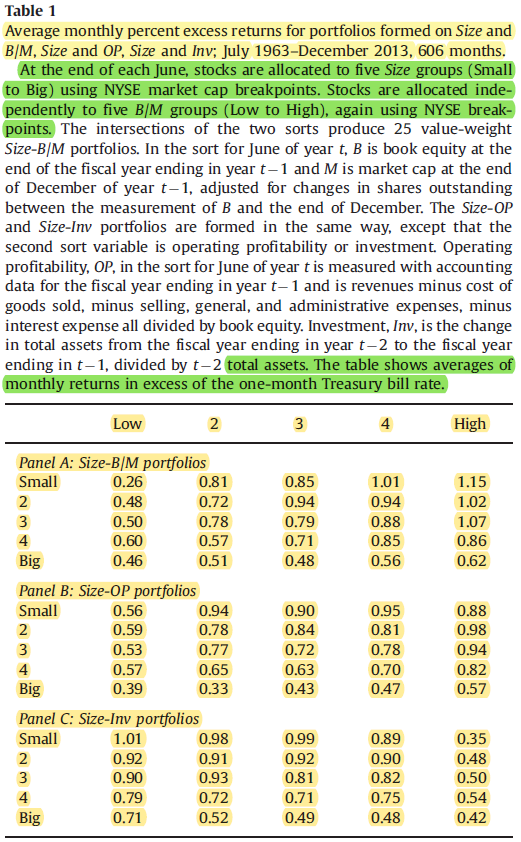

References:
- Fama, Eugene F. and Kenneth R. French, 1993, Common Risk Factors in Stocks and Bonds, Journal of Financial Economics, 33, 3-56.
- Fama, E.F. and French, K.R., 2015. A five-factor asset pricing model. Journal of financial economics, 116(1), pp.1-22.

# Script

In [1]:
# list of all measures for which a factor will be computed
all_measures=['bm','op','inv','nf']
# measures for which all the breakpoints (10_90, 20_80, 30_70, 40_60) subsets are used instead of the default 30_70
# measures_robust_check_bp=['bm', 'inv', 'op', 'nf']
measures_robust_check_bp=[]

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import *
from pandas.tseries.offsets import *
import matplotlib.pyplot as plt
import urllib
import zipfile
from scipy import stats
import glob
from tqdm import tqdm
import warnings
from itertools import combinations

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

#set to 1 to delete intermediate datasets
save_memory=0

#set to 1 to print more check outputs
print_advance_output=1

## Functions

In [3]:
# function to calculate value weighted return
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return np.nan

In [4]:
def read_ff_test_assets(url):
    zip_name=url.split('/')[-1]
    file_name=zip_name.split('.')[0].replace('_CSV','.csv')
    urllib.request.urlretrieve(url,zip_name)
    zip_file = zipfile.ZipFile(zip_name, 'r')
    zip_file.extractall()
    zip_file.close()
    with open(file_name) as f:
        lines=f.readlines()
        num = [i for i, l in enumerate(lines) if l=='  Average Value Weighted Returns -- Monthly\n']
    rows_to_skip=num[0]+1
    ff_ptfs=pd.read_csv(file_name, skiprows=rows_to_skip, encoding='cp1252').rename(columns={'Unnamed: 0':'date'})
    ff_ptfs=ff_ptfs.iloc[:ff_ptfs.loc[:,'date'].isnull().idxmax()-1]
    ff_ptfs['date']=pd.to_datetime(ff_ptfs['date'], format='%Y%m')
    ff_ptfs.set_index('date', inplace=True)
    # ff_ptfs=ff_ptfs[(ff_ptfs.index >= pd.to_datetime(test_startdate, format='%Y%m').to_period('m')) & (ff_ptfs.index <= pd.to_datetime(test_enddate, format='%Y%m').to_period('m'))]
    ff_ptfs=ff_ptfs.astype(float).div(100)
    ff_ptfs.index = pd.to_datetime(ff_ptfs.index, format='%Y%m')+MonthEnd(0)
    ff_ptfs=ff_ptfs[ff_ptfs.index<=ff_factors_original.index.max()]
    ff_ptfs=ff_ptfs[ff_ptfs.index>=ff_factors_original.index.min()]
    return ff_ptfs

## Computation

In [5]:
bivariate_sorts=[("_".join(map(str, comb))) for comb in combinations(['size']+all_measures, 2)]
  
# Print the obtained permutations 
print('bivariate sorts portfolios built on:\n- {}'.format('\n- '.join(bivariate_sorts))+'\n')

bivariate sorts portfolios built on:
- size_bm
- size_op
- size_inv
- size_nf
- bm_op
- bm_inv
- bm_nf
- op_inv
- op_nf
- inv_nf



In [6]:
project_path="G:\\My Drive\\PhD\\Research\\Indipendent project\\"
factors_path="G:\\My Drive\\PhD\\Research\\Indipendent project\\estimated_data\\factors\\"
test_assets_path="G:\\My Drive\\PhD\\Research\\Indipendent project\\estimated_data\\test_assets\\bivariate_sort\\"
ff5measures_path="G:\\My Drive\\PhD\\Research\\Indipendent project\\estimated_data\\FF5 measures\\"
nf_measures_path="G:\\My Drive\\PhD\\Research\\Indipendent project\\estimated_data\\measures\\"

Read the CRSP table with stock returns produced by FF5_measures_computer_and_FF5_factors_replicator\FF5_measures_computer_and_FF5_factors_replicator.ipynb

In [7]:
crsp3=pd.read_csv(ff5measures_path+'crsp_returns.csv', sep=',')
crsp3['jdate']=pd.to_datetime(crsp3['jdate'])
crsp3

permno        date      jdate  ffyear    retadj            wt
0         10000  1986-07-31 1986-07-31    1986 -0.080808  1.173459e+04
1         10000  1986-08-29 1986-08-31    1986 -0.615385  1.078634e+04
2         10000  1986-09-30 1986-09-30    1986 -0.057143  4.148594e+03
3         10000  1986-10-31 1986-10-31    1986 -0.242424  3.911531e+03
4         10000  1986-11-28 1986-11-30    1986  0.060000  2.963281e+03
...         ...         ...        ...     ...       ...           ...
3068885   93436  2020-08-31 2020-08-31    2020  0.741452  2.661214e+08
3068886   93436  2020-09-30 2020-09-30    2020 -0.139087  4.634376e+08
3068887   93436  2020-10-30 2020-10-31    2020 -0.095499  3.989793e+08
3068888   93436  2020-11-30 2020-11-30    2020  0.462736  3.608772e+08
3068889   93436  2020-12-31 2020-12-31    2020  0.243252  5.278680e+08

[3068890 rows x 6 columns]

Read the original Fama and French factors

In [8]:
ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_CSV.zip"
urllib.request.urlretrieve(ff_url,'F-F_Research_Data_5_Factors_2x3_CSV.zip ')
zip_file = zipfile.ZipFile('F-F_Research_Data_5_Factors_2x3_CSV.zip', 'r')
zip_file.extractall()
zip_file.close()
ff_factors_original = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv', skiprows = 3)
ff_factors_original = ff_factors_original[0:ff_factors_original.isnull().any(axis=1).idxmax()].rename(columns={'Unnamed: 0':'date'}).set_index('date').astype(float).div(100)
ff_factors_original.index = pd.to_datetime(ff_factors_original.index, format='%Y%m')+MonthEnd(0)
ff_factors_original=ff_factors_original[ff_factors_original.index<=crsp3['date'].max()]
ff_factors_original

Mkt-RF     SMB     HML     RMW     CMA      RF
date                                                      
1963-07-31 -0.0039 -0.0045 -0.0094  0.0066 -0.0115  0.0027
1963-08-31  0.0507 -0.0082  0.0182  0.0040 -0.0040  0.0025
1963-09-30 -0.0157 -0.0048  0.0017 -0.0076  0.0024  0.0027
1963-10-31  0.0253 -0.0130 -0.0004  0.0275 -0.0224  0.0029
1963-11-30 -0.0085 -0.0085  0.0170 -0.0045  0.0222  0.0027
...            ...     ...     ...     ...     ...     ...
2020-08-31  0.0763 -0.0094 -0.0294  0.0427 -0.0144  0.0001
2020-09-30 -0.0363  0.0007 -0.0251 -0.0115 -0.0177  0.0001
2020-10-31 -0.0210  0.0476  0.0403 -0.0060 -0.0053  0.0001
2020-11-30  0.1247  0.0675  0.0211 -0.0278  0.0105  0.0001
2020-12-31  0.0463  0.0467 -0.0136 -0.0215  0.0000  0.0001

[690 rows x 6 columns]

Reading the original Fama and French Bivariate sort portfolios

In [9]:
FamaFrench_test_assets_repository={
'size_bm':'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_5x5_CSV.zip',
'size_inv':'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_ME_INV_5x5_CSV.zip',
'size_op':'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_ME_OP_5x5_CSV.zip',
'bm_inv':'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_BEME_INV_5x5_CSV.zip',
'bm_op':'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_BEME_OP_5x5_CSV.zip',
'op_inv':'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_OP_INV_5x5_CSV.zip'
                                    }

In [10]:
if "assets_downloaded" not in locals():
    ff_test_assets=pd.DataFrame()
    for key in FamaFrench_test_assets_repository:
        print(key, '->', FamaFrench_test_assets_repository[key])
        ptfs_i=read_ff_test_assets(FamaFrench_test_assets_repository[key])
        print('downloaded {}: {} dates {} portfolios'.format(key, ptfs_i.shape[0],ptfs_i.shape[1]))
        ptfs_i=ptfs_i.reset_index().melt(id_vars='date', var_name='ptf_code', value_name='ret')
        ptfs_i['sort_on']=key
        ff_test_assets=pd.concat([ff_test_assets,ptfs_i], axis=0)
        assets_downloaded=[]
    ff_test_assets['ptf_code']=ff_test_assets['ptf_code'].str.replace('SMALL','ME1')
    ff_test_assets['ptf_code']=ff_test_assets['ptf_code'].str.replace('BIG','ME5')
    ff_test_assets['ptf_code']=ff_test_assets['ptf_code'].str.replace('LoBM','BM1')
    ff_test_assets['ptf_code']=ff_test_assets['ptf_code'].str.replace('HiBM','BM5')
    ff_test_assets['ptf_code']=ff_test_assets['ptf_code'].str.replace('LoINV','INV1')
    ff_test_assets['ptf_code']=ff_test_assets['ptf_code'].str.replace('HiINV','INV5')
    ff_test_assets['ptf_code']=ff_test_assets['ptf_code'].str.replace('LoOP','OP1')
    ff_test_assets['ptf_code']=ff_test_assets['ptf_code'].str.replace('HiOP','OP5')
    ff_test_assets['ptf_code']=ff_test_assets['ptf_code'].str.replace(' ','_')
    ff_test_assets['ptf_code']=ff_test_assets['ptf_code'].str.replace('ME','size')
    ff_test_assets['ptf_code']=ff_test_assets['ptf_code'].str.replace('BM','bm')
    ff_test_assets['ptf_code']=ff_test_assets['ptf_code'].str.replace('INV','inv')
    ff_test_assets['ptf_code']=ff_test_assets['ptf_code'].str.replace('OP','op')    
    ff_test_assets.set_index(['date','ptf_code'], inplace=True)
ff_test_assets    

size_bm -> https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_5x5_CSV.zip
downloaded size_bm: 690 dates 25 portfolios
size_inv -> https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_ME_INV_5x5_CSV.zip
downloaded size_inv: 690 dates 25 portfolios
size_op -> https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_ME_OP_5x5_CSV.zip
downloaded size_op: 690 dates 25 portfolios
bm_inv -> https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_BEME_INV_5x5_CSV.zip
downloaded bm_inv: 690 dates 25 portfolios
bm_op -> https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_BEME_OP_5x5_CSV.zip
downloaded bm_op: 690 dates 25 portfolios
op_inv -> https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_OP_INV_5x5_CSV.zip
downloaded op_inv: 690 dates 25 portfolios


ret  sort_on
date       ptf_code                    
1963-07-31 size1_bm1  0.011307  size_bm
1963-08-31 size1_bm1  0.042370  size_bm
1963-09-30 size1_bm1 -0.028878  size_bm
1963-10-31 size1_bm1  0.012885  size_bm
1963-11-30 size1_bm1 -0.033751  size_bm
...                        ...      ...
2020-08-31 op5_inv5   0.075996   op_inv
2020-09-30 op5_inv5  -0.053654   op_inv
2020-10-31 op5_inv5  -0.030481   op_inv
2020-11-30 op5_inv5   0.081545   op_inv
2020-12-31 op5_inv5   0.034397   op_inv

[103500 rows x 2 columns]

Reading FF5 measures

In [11]:
ff5_measures=pd.read_csv(ff5measures_path+'FF5_measures.csv', sep=',')
ff5_measures['jdate']=pd.to_datetime(ff5_measures['jdate'])
# ff5_measures.set_index(['permno','jdate'], inplace=True)/
#in order to keep using part of the scritp "FF5_measures_computer_and_FF5_factors_replicator" the info in ff5_measures
#can be used instea of the original ccm_jun. A copy is done to avoid changing variable names later
ccm_jun=ff5_measures.copy()
if save_memory:
    del ff5_measures
ccm_jun

permno      jdate            me      beme       inv        op  \
0        10001 1988-06-30  6.200000e+03  1.207618       NaN  0.110827   
1        10001 1989-06-30  7.007000e+03  1.145192 -0.003058  0.152484   
2        10001 1990-06-30  1.005225e+04  0.818149  0.582020  0.283841   
3        10001 1991-06-30  1.126650e+04  0.942575  0.017021  0.263297   
4        10001 1992-06-30  1.263125e+04  0.667907  0.038028  0.229853   
...        ...        ...           ...       ...       ...       ...   
223277   93436 2016-06-30  3.142062e+07  0.035855  0.383504 -0.401743   
223278   93436 2017-06-30  6.033933e+07  0.137924  1.800641  0.010911   
223279   93436 2018-06-30  5.847846e+07  0.080626  0.264352 -0.113322   
223280   93436 2019-06-30  4.002571e+07  0.085708  0.037837  0.167355   
223281   93436 2020-06-30  2.008447e+08  0.087374  0.153646  0.202589   

        is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  shrcd        dec_me  \
0                1           1          0         1     11  5.828000e+03   
1                1           1          1         1     11  6.362250e+03   
2                1           1          1         1     11  1.034775e+04   
3                1           1          1         1     11  1.001300e+04   
4                1           1          1         1     11  1.558750e+04   
...            ...         ...        ...       ...    ...           ...   
223277           1           1          1         1     11  3.154331e+07   
223278           1           1          1         1     11  3.452397e+07   
223279           1           1          1         1     11  5.255495e+07   
223280           1           1          1         1     11  5.744194e+07   
223281           1           1          1         1     11  7.574366e+07   

              be      mib       revt      xsga     xint       cogs  exchcd  \
0          7.038    0.000     16.621       NaN    0.303     15.538       3   
1          7.286    0.000     16.978       NaN    0.311     15.556       3   
2          8.466    0.000     22.910       NaN    0.651     19.856       3   
3          9.438    0.000     23.227       NaN    0.835     19.907       3   
4         10.411    0.000     23.850       NaN    0.775     20.682       3   
...          ...      ...        ...       ...      ...        ...     ...   
223277  1130.989    0.000   4046.025  1640.132  160.328   2699.932       3   
223278  4761.695  367.039   7000.132  2244.897  245.501   4453.776       3   
223279  4237.312  397.734  11758.751  3787.573  596.172   7900.261       3   
223280  4923.243  555.964  21461.268  4294.861  717.971  15531.461       3   
223281  6618.000  643.000  24578.000  3989.000  716.000  18402.000       3   

                prc    shrout  
0          6.250000     992.0  
1          7.000000    1001.0  
2          9.750000    1031.0  
3         10.500000    1073.0  
4         11.750000    1075.0  
...             ...       ...  
223277   212.279999  148015.0  
223278   361.609985  166863.0  
223279   342.950012  170516.0  
223280   223.460007  179118.0  
223281  1079.810059  186000.0  

[223282 rows x 21 columns]

Clone ccm_jun and crsp3 to preserve the original and recall them at every new computation without reloading them

In [12]:
ccm_jun_original=ccm_jun.drop(columns=ccm_jun.columns[ccm_jun.columns.str.contains('_ok')], axis=0).copy() #dropped the is_.._ok columns
crsp3_original=crsp3.copy()

Reading the new factor measures files

In [13]:
nf_measures_files=glob.glob(nf_measures_path+"*.csv")
nf_measures_files

['G:\\My Drive\\PhD\\Research\\Indipendent project\\estimated_data\\measures\\measures_196306_202006_FFmkt_S=[0  1]_exc_states2_classifier_v1.csv',
 'G:\\My Drive\\PhD\\Research\\Indipendent project\\estimated_data\\measures\\measures_196306_202006_FFmkt_S=[0  1]_exc_states2_classifier_v2.csv',
 'G:\\My Drive\\PhD\\Research\\Indipendent project\\estimated_data\\measures\\measures_196306_202006_FFmkt_S=[0  1]_exc_states2_classifier_v3.csv',
 'G:\\My Drive\\PhD\\Research\\Indipendent project\\estimated_data\\measures\\measures_196306_202006_FFmkt_S=[0  1]_states2_classifier_v1.csv',
 'G:\\My Drive\\PhD\\Research\\Indipendent project\\estimated_data\\measures\\measures_196306_202006_FFmkt_S=[0  1]_states2_classifier_v2.csv',
 'G:\\My Drive\\PhD\\Research\\Indipendent project\\estimated_data\\measures\\measures_196306_202006_FFmkt_S=[0  1]_states2_classifier_v3.csv',
 'G:\\My Drive\\PhD\\Research\\Indipendent project\\estimated_data\\measures\\measures_196306_202006_FFmkt_S=[1  0]_exc_stat

In [16]:
print('##################################################################################################################')
print('##################################################################################################################')
print('### START LOOP ON MEASURES FILES')
print('##################################################################################################################')
print('##################################################################################################################')

# for f in tqdm([nf_measures_files[15]], desc='measures_files_loop'): #DEBUG: SLICING LIST OF MEASURES FILES
for f in tqdm(nf_measures_files, desc='measures_files_loop'): 

    ptfs2export=pd.DataFrame()
    ptfs_nfirms2export=pd.DataFrame()
    
    #read the file
    print('#####################################################################################')
    print("reading file {}".format(f.split('\\')[-1]))
    pd.read_csv(f)
    nf_measures=pd.read_csv(f)
    nf_measures.rename(columns={'date':'jdate'}, inplace=True)
    nf_measures['jdate']=pd.to_datetime(nf_measures['jdate'], format="%Y%m")+MonthEnd(0)    
    nf_measures=pd.merge(ccm_jun_original.loc[:,['permno','jdate']], nf_measures, how='inner', on=['permno','jdate'])
    nf_measures.set_index(['jdate','permno'], inplace=True)
    
    measures_legend_f=nf_measures.columns.to_frame().reset_index().drop(columns=0).rename(columns={'index':'measure'})
    measures_legend_f['index']=measures_legend_f.index+1

    print('#####################################################################################')
    print('min, max and mean number of stocks with good measure, over periods, for each measure')    
    print(nf_measures.notna().groupby('jdate').sum().agg(['min', 'max', 'mean']).T.astype(int))

    #filter the pairs of stocks and june dates not in common betweeen FF5 measures and New Factor measures
    ccm_jun=pd.merge(ccm_jun_original, nf_measures, how='inner', left_on=['jdate','permno'], right_index=True).loc[:,ccm_jun_original.columns.to_list()]
    print('#####################################################################################')
    print("{} pairs of stocks and june dates in common betweeen FF5 and New Factor".format(ccm_jun.shape[0]))

    # at this point shrcd different from 10 and 11, not valid price and shares and company with less than 2 years of
    # history on Compustat have been removed, even though their conditions are explicitly present here

    # Adding flag to the stocks with good FF5 measures
    ccm_jun.loc[:,'is_size_ok']=np.where((ccm_jun['me']>0)&
                                          ((ccm_jun['shrcd']==10) | (ccm_jun['shrcd']==11))
                                          ,1,0)

    ccm_jun.loc[:,'is_beme_ok']=np.where((ccm_jun['be']>0)&
                                          (ccm_jun['dec_me'].notna())&
                                          ((ccm_jun['shrcd']==10) | (ccm_jun['shrcd']==11))&
                                          (ccm_jun['me']>0),1,0)

    ccm_jun.loc[:,'is_inv_ok']=np.where((ccm_jun['inv'].notna())&
                                         ((ccm_jun['shrcd']==10) | (ccm_jun['shrcd']==11))&
                                         (ccm_jun['me']>0),1,0)

    ccm_jun.loc[:,'is_op_ok']=np.where(((ccm_jun['be'])>0)&(ccm_jun['revt'].notna())&
                                        (ccm_jun.loc[:,['xsga','xint','cogs']].notna().any(axis=1))&
                                        ((ccm_jun['shrcd']==10) | (ccm_jun['shrcd']==11))&
                                        (ccm_jun['me']>0),1,0)

    #assign portfolios for FF5 measures based on independent univariate sorting

    # assign size portfolios 
    size_ptf=(ccm_jun.set_index(['permno']).groupby('jdate')
                                          .apply(lambda x:
                                                          pd.cut(x['me'], [-float("inf")]+
                                                                          x[(x['exchcd']==1)&
                                                                          ((x['shrcd']==10) | (x['shrcd']==11))&
                                                                          (~x['prc'].isna())&
                                                                          (~x['shrout'].isna())]['me']
                                                                          .quantile([0.2, 0.4, 0.6, 0.8])
                                                                          .reset_index()['me'].to_list()
                                                                           +[float("inf")],
                                                                 labels=['size1','size2','size3','size4','size5'],
                                                                 right=True, include_lowest=True
                                                                )
                                                ).to_frame()).rename(columns={'me':'sizeport'})
    
    # assign book-to-market portfolios 
    beme_ptf=(ccm_jun.set_index(['permno']).groupby('jdate')
                                          .apply(lambda x:
                                                          pd.cut(x['beme'], [-float("inf")]+
                                                                            x[(x['exchcd']==1)&
                                                                            ((x['shrcd']==10) | (x['shrcd']==11))&
                                                                            (~x['dec_me'].isna())&
                                                                            (x['be']>0)]['beme']
                                                                            .quantile([0.2, 0.4, 0.6, 0.8])
                                                                            .reset_index()['beme'].to_list()
                                                                            +[float("inf")],
                                                                 labels=['bm1','bm2','bm3','bm4','bm5'],
                                                                 right=True, include_lowest=True
                                                                )
                                                ).to_frame()).rename(columns={'beme':'bmport'})
    
    # assign operating profitability portfolios
    op_ptf=(ccm_jun.set_index(['permno']).groupby('jdate')
                                          .apply(lambda x:
                                                          pd.cut(x['op'], [-float("inf")]+
                                                                          x[(x['exchcd']==1)&
                                                                          ((x['shrcd']==10) | (x['shrcd']==11))&  
                                                                          (x['be']>0)&                               
                                                                          (~x['revt'].isna())&
                                                                          (~x.loc[:,['cogs','xsga','xint']].isna()
                                                                          .all(axis=1))]['op']
                                                                          .quantile([0.2, 0.4, 0.6, 0.8])
                                                                          .reset_index()['op'].to_list()
                                                                          +[float("inf")],
                                                                 labels=['op1','op2','op3','op4','op5'],
                                                                 right=True, include_lowest=True
                                                                )
                                                ).to_frame()).rename(columns={'op':'opport'})
 
    
    # assign investments portfolios 
    inv_ptf=(ccm_jun.set_index(['permno']).groupby('jdate')
                                          .apply(lambda x:
                                                          pd.cut(x['inv'],[-float("inf")]+
                                                                          x[(x['exchcd']==1)&
                                                                          ((x['shrcd']==10) | (x['shrcd']==11))&                 
                                                                          (~x['inv'].isna())]['inv']
                                                                          .quantile([0.2, 0.4, 0.6, 0.8])
                                                                          .reset_index()['inv'].to_list()
                                                                          +[float("inf")],
                                                                 labels=['inv1','inv2','inv3','inv4','inv5'],
                                                                 right=True, include_lowest=True
                                                                )
                                                ).to_frame()).rename(columns={'inv':'invport'})

    #join back size, beme and inv breakdown
    portfolios = pd.merge(inv_ptf,pd.merge(pd.merge(size_ptf, beme_ptf, how='outer', right_index=True, left_index=True), op_ptf, how='outer', right_index=True, left_index=True), how='outer', right_index=True, left_index=True)

    # allign breakpoints to variables
    ccm1_jun = pd.merge(ccm_jun, portfolios, how='left', left_on=['jdate','permno'], right_index=True)
    ccm1_jun['ffyear']=ccm1_jun['jdate'].dt.year
    ccm1_jun

    print('##################################################################################################################')
    print('### START LOOP ON MEASURES OF FILE: {}'.format(f.split('\\')[-1]))
    print('##################################################################################################################')

#     nf_measures=nf_measures.iloc[:,13:]#.to_frame() #DEBUG: UNCOMMENT
    for current_measure, m in tqdm(nf_measures.iteritems(), total=nf_measures.shape[1], desc='measures_loop'):  
        print('#########################################################################')
        print("current measure: {}".format(current_measure))
        print('#########################################################################')
        nf_measure_i=m.to_frame().reset_index().rename(columns={current_measure:'nf'}) 
        
#         nf_measure_not_good=0
        
        #initialize the dataframe where all the ptfs for the current measure will be saved
        ptfs_m=pd.DataFrame()
        ptfs_nfirms_m=pd.DataFrame()
        
        #Join the current measure with FF5 measures, and filter the dates previous the first new factor measure available.
        #First delete columns related to the previous measure 
        ccm1_jun=ccm1_jun.drop(columns=ccm1_jun.columns[ccm1_jun.columns.str.contains('nf')].to_list())
        ccm1_jun=pd.merge(ccm1_jun, nf_measure_i, how='inner', on=['permno','jdate'])

        
        #if the observations for the current measures are all 0, the column is set to nan and continue
        if ccm1_jun['nf'].abs().sum()==0:
            ccm1_jun['nf']=np.nan
            print("##################################################\n!!!!!!!! measures not available !!!!!!!!")
            continue #DEBUG: COMMENT
            
        print('#########################################################################')
        print("ccm1_jun dimension: {} {}".format(ccm1_jun.shape[0],ccm1_jun.shape[1]))
        print('missing measures (%)')
        print(ccm1_jun.loc[:,['beme','inv', 'op', 'nf']].isna().sum().div(ccm1_jun.shape[0], axis=0).round(4)*100)
        print('#########################################################################')

        ccm1_jun.loc[:,'is_nf_ok']=np.where((ccm1_jun['nf'].notna())&
                                             ((ccm1_jun['shrcd']==10) | (ccm1_jun['shrcd']==11))&
                                             (ccm1_jun['me']>0),1,0)
   
        # at this point shrcd different from 10 and 11, not valid price and shares and company with less than 2 years of
        # history on Compustat have been removed, even though their conditions are explicitly present here

        #Statistics about stock with available measures

        stocks_good_measures_n=(ccm1_jun.loc[:,['jdate']+ccm1_jun.columns[ccm1_jun.columns.str.contains('_ok')].to_list()].groupby('jdate').sum())
        stocks_good_measures_perc=(ccm1_jun.loc[:,['jdate']+ccm1_jun.columns[ccm1_jun.columns.str.contains('_ok')].to_list()].groupby('jdate').sum()).div(ccm1_jun.groupby('jdate').size(), axis=0).round(4)*100
        print("#########################################################################\nstocks available for each measures (number)")
        print(stocks_good_measures_n)
        print("#########################################################################")        
        

        #check if for each date there is at least one stock with nf measure available
#         if ccm1_jun.groupby('jdate')['is_nf_ok'].sum().min()==0:
#             print('!!!!!!!!!!!!there are dates with not even one stock with nf measure available!!!!!!!!!!!!')
#             nf_measure_not_good=1 #when set to 1, construction of portfolios based on sort on nf measures, are skipped
#         else:

        # assign new factor portfolios
        epsilon=0.00000000001 #for many measure the bins are not monotonically increasing, therefore a decreasing value (proportional to epsilon) is subracted to each bin edge to make them monotonically increasing
        dates_with_at_least_2_nf=ccm1_jun[(ccm1_jun['exchcd']==1)&((ccm1_jun['shrcd']==10) | (ccm1_jun['shrcd']==11))&(~ccm1_jun['nf'].isna())].groupby('jdate')['nf'].nunique().to_frame()
        dates_with_at_least_2_nf=dates_with_at_least_2_nf[dates_with_at_least_2_nf['nf']>=2].reset_index()['jdate']
        ccm1_jun_with_at_least_2_valid_nf_for_each_per_period=pd.merge(ccm1_jun, dates_with_at_least_2_nf.to_frame(), how='inner', on='jdate').reset_index().dropna(subset=['nf'])
        nf_ptf=(ccm1_jun_with_at_least_2_valid_nf_for_each_per_period.dropna(subset=['nf']).set_index(['permno']).groupby('jdate')
                                              .apply(lambda x: pd.cut(x['nf'], ([-float("inf")]+
                                                                                [l-epsilon*(4-ind-1) for ind, l in 
                                                                                enumerate(
                                                                                x[(x['exchcd']==1)&
                                                                                ((x['shrcd']==10) | (x['shrcd']==11))&                                           
                                                                                (~x['nf'].isna())]['nf']
                                                                                .quantile([0.2, 0.4, 0.6, 0.8])
                                                                                .reset_index()['nf'].to_list() 
                                                                                )]
                                                                                +[float("inf")]),
                                                                     labels=['nf1','nf2','nf3','nf4','nf5'],
                                                                     right=True, include_lowest=True
                                                                    )
                                                    ).to_frame()).reset_index().rename(columns={'nf':'nfport'}) 
        ccm1_jun = pd.merge(ccm1_jun, nf_ptf, how='left', on=['jdate','permno'])        
        

            #check/debug querys
    #         nf_bp=(ccm1_jun[(ccm1_jun['exchcd']==1)&
    #         ((ccm1_jun['shrcd']==10) | (ccm1_jun['shrcd']==11))&                                           
    #         (~ccm1_jun['nf'].isna())].groupby('jdate')['nf']
    #         .quantile([0, 0.2, 0.4, 0.6, 0.8, 1])).to_frame().reset_index().rename(columns={'level_1':'nf_bp'})
    #         print(pd.pivot(nf_bp, index='jdate', columns='nf_bp', values='nf').add_prefix('nf_'))

        #check whether accidentally some not ok permno received a portfolio
        if (ccm1_jun[ccm1_jun['is_size_ok']==0]['sizeport'].nunique()+
         ccm1_jun[ccm1_jun['is_beme_ok']==0]['bmport'].nunique()+
         ccm1_jun[ccm1_jun['is_op_ok']==0]['opport'].nunique()+
         ccm1_jun[ccm1_jun['is_inv_ok']==0]['invport'].nunique()) !=0:
            print('!!!!!!!!!!!!!!!!!!accidentally some not ok permno received a portfolio!!!!!!!!!!!!!!!!!!')

        # store portfolio assignment as of June
        june=ccm1_jun.loc[:,['permno','ffyear']+ccm1_jun.columns[ccm1_jun.columns.str.contains('port')].to_list()]
        if save_memory:
            del ccm1_jun

        # merge back with monthly records
        crsp3 = crsp3_original[['date','permno','retadj','wt','ffyear','jdate']]
        ccm3=pd.merge(crsp3,june, how='left', on=['permno','ffyear'])
        if save_memory:
            del june
            del crsp3
        ccm3.dropna(axis=0, how='all', subset=ccm3.columns[ccm3.columns.str.contains('port')], inplace=True)

        ################################
        ## Bivariate sorts portfolios ##
        ################################
        print('################################\n## Bivariate sorts portfolios ##\n################################')
    
        #loop on the pair of measures for the bivariate sort
        for sort_on in bivariate_sorts:
            
#             if ('nf' in sort_on)&(nf_measure_not_good==1):
#                     print('#################################################################################\n!!!!!!!!!!!Skip construction double sort portfolios based on {} !!!!!!!!!!!'.format(', '.join(sort_on.split('_'))))
#                     continue
                    
            print('#################################################################################\nConstructing double sort portfolios based on {}'.format(', '.join(sort_on.split('_'))))
            sort_on_cols=[m+'port' for m in sort_on.split('_')]

            # select the columns that contains portfolios
            ccm4=ccm3[['jdate','retadj','wt']+sort_on_cols]

            ### calculate the portfolio returns
            ccm4['retadj_X_wt']=ccm4['retadj']*ccm4['wt']
            vwret=ccm4.groupby(['jdate']+ccm4.columns[ccm4.columns.str.contains('port')].to_list())['wt','retadj_X_wt'].sum().reset_index()
            vwret['vwret']=vwret['retadj_X_wt']/vwret['wt']
            vwret[sort_on_cols]=vwret[sort_on_cols].astype(str)
            vwret['ptf_code']=vwret[sort_on_cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

            print("unique values of number of portfolios for each date: {}".format(vwret.groupby('jdate')['ptf_code'].nunique().unique()))
            

            # transpose and add missing date (right join with ff_factors_original)
            ptfs=vwret.pivot(index='jdate', columns='ptf_code', values='vwret').reset_index().rename(columns={'jdate':'date'}).sort_values('date').set_index('date').fillna(0)
            ptfs=pd.merge(ff_factors_original, ptfs, how='left', left_index=True, right_index=True).drop(columns=ff_factors_original.columns.to_list())

            if ptfs.shape[1]!=25:
                print("!!!!!!!!!!!!!!!!!!!!building block portfolio missing!!!!!!!!!!!!!!!!!!!!")
                continue #DEBUG: COMMENT

            # integrate the factors table with the risk-free
            ptfs=pd.merge(ff_factors_original['RF'].to_frame(), ptfs, how='left', right_index=True, left_index=True)
            ptfs=ptfs.sub(ff_factors_original['RF'], axis=0).drop(columns='RF')
           
            print("computing portfoliost: {} dates, {} portfolios, from {} to {}".format(ptfs.shape[0], ptfs.shape[1], ptfs.index.date.min(), ptfs.index.date.max()))          

            #firms count
            ptfs_nfirms=ccm4.groupby(['jdate']+ccm4.columns[ccm4.columns.str.contains('port')].to_list())['retadj_X_wt'].count().reset_index()
            ptfs_nfirms[sort_on_cols]=ptfs_nfirms[sort_on_cols].astype(str)
            ptfs_nfirms['ptf_code']=ptfs_nfirms[sort_on_cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
            ptfs_nfirms=ptfs_nfirms.pivot(index='jdate', columns='ptf_code', values='retadj_X_wt').reset_index().rename(columns={'jdate':'date'}).sort_values('date').set_index('date').fillna(0)
            ptfs_nfirms=pd.merge(ff_factors_original.index.to_frame(),ptfs_nfirms , how='right', left_index=True, right_index=True).drop(columns='date')

            ptfs_nfirms_perc=pd.merge(ptfs_nfirms, ccm3.groupby('jdate').size().to_frame(), how='inner', right_index=True, left_index=True)
            ptfs_nfirms_perc=np.sum(ptfs_nfirms_perc.div(ptfs_nfirms_perc[0], axis=0).drop(columns=0).round(4)*100, axis=1)

            print("average percentage of stocks available for each measure: {}".format(ptfs_nfirms_perc.mean(axis=0)))

            #appends to ptfs for the current measure
            ptfs=ptfs.reset_index().melt(id_vars='date', var_name='ptf_code', value_name='ret').set_index(['date','ptf_code'])
            ptfs['sort_on']=sort_on
            ptfs['measure']=measures_legend_f.loc[measures_legend_f['measure']==current_measure,'index'].values[0]
            ptfs_m=pd.concat([ptfs_m,ptfs], axis=0)

            #append to ptfs nfirms for the current measure
            ptfs_nfirms=ptfs_nfirms.reset_index().melt(id_vars='date', var_name='ptf_code', value_name='nfirms').set_index(['date','ptf_code'])
            ptfs_nfirms['sort_on']=sort_on
            ptfs_nfirms['measure']=measures_legend_f.loc[measures_legend_f['measure']==current_measure,'index'].values[0]
            ptfs_nfirms_m=pd.concat([ptfs_nfirms_m,ptfs_nfirms], axis=0)

        #statistcs for the ptfs of the current measure
        ptfs_comp=pd.merge(ptfs_m.drop(columns=['measure']), ff_test_assets, how='right', on=['date','ptf_code'])
        print('####################################################################\n####################################################################\ncorrelation between original Fama French test assets and replicated:')
        print(ptfs_comp.groupby('sort_on_x')['ret_x','ret_y'].apply(lambda x: x.corr().iloc[0,1]))

        #append the current measure ptfs to the current file ptfs
        ptfs2export=pd.concat([ptfs2export, ptfs_m], axis=0) 
        ptfs_nfirms2export=pd.concat([ptfs_nfirms2export, ptfs_nfirms], axis=0) 

    #write tables to export, to files
    ptfs_nfirms2export.to_csv(test_assets_path+f.split('\\')[-1].split('.')[0].replace('measures_','bivariate_sorts_test_portfolios_nfirms_')+'.csv', index = True, float_format='%.6f')
    ptfs2export.to_csv(test_assets_path+f.split('\\')[-1].split('.')[0].replace('measures_','bivariate_sorts_test_portfolios_')+'.csv', index = True, float_format='%.6f')
    measures_legend_f.to_csv(test_assets_path+f.split('\\')[-1].split('.')[0].replace('measures_','measures_legend_bivariate_sorts_test_portfolios_')+'.csv', index = False, float_format='%.6f')
    

measures_files_loop:   0%|                                                                      | 0/18 [00:00<?, ?it/s]

##################################################################################################################
##################################################################################################################
### START LOOP ON MEASURES FILES
##################################################################################################################
##################################################################################################################
#####################################################################################
reading file measures_196306_202006_FFmkt_S=[0  1]_exc_states2_classifier_v1.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5608  3484
Harding_and_Pagan_2002_0.5       


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[0  1]_exc_states2_classifier_v1.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                  

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22163768115942
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:



measures_loop:   4%|██▋                                                                 | 1/25 [00:27<10:51, 27.15s/it]

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-3

average percentage of stocks available for each measure: 89.22173913043478



measures_loop:   8%|█████▍                                                              | 2/25 [00:49<09:54, 25.83s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22214492753623



measures_loop:  12%|████████▏                                                           | 3/25 [01:12<09:05, 24.81s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      44.45
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 52.730318840579706



measures_loop:  16%|██████████▉                                                         | 4/25 [01:36<08:34, 24.49s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      26.38
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_o

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 71.92446376811594
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  20%|█████████████▌                                                      | 5/25 [01:58<07:57, 23.87s/it]

#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.49
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       329
1964-06-30        1019         450        983       448       414
1965-06-30        1132         549       1111       546       658
1966-06-30        1396         733       1348       730       827
1967-06-30  


measures_loop:  24%|████████████████▎                                                   | 6/25 [02:20<07:21, 23.22s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  28%|███████████████████                                                 | 7/25 [02:39<06:38, 22.12s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967


measures_loop:  32%|█████████████████████▊                                              | 8/25 [02:59<06:05, 21.50s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  36%|████████████████████████▍                                           | 9/25 [03:16<05:21, 20.12s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1


measures_loop:  40%|██████████████████████████▊                                        | 10/25 [03:35<04:53, 19.58s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        

dtype: float64



measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [03:53<04:30, 19.29s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [04:11<04:05, 18.92s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14


measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [04:29<03:43, 18.61s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      29.10
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       639
1964-06-30        1019         450        983       448       670
1965-06-30        1132         549       1111       546       907
1966-06-30        1396         733       1348       730 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [04:49<03:28, 18.94s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [05:15<03:32, 21.22s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [05:41<03:23, 22.63s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

dtype: float64



measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [06:05<03:03, 22.94s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [06:27<02:38, 22.64s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [06:47<02:12, 22.02s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [07:08<01:48, 21.60s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [07:31<01:28, 22.10s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   


measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [07:53<01:05, 21.94s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 


measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [08:17<00:45, 22.54s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      68.23
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       265
1964-06-30        1019         450        983       448       339
1965-06-30        1132         549       1111       546       459
1966-06-30        1396         733       1348       730       657
1967-0

dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [08:36<00:21, 21.43s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      68.23
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       265
1964-06-30        1019         450        983       448       339
1965-06-30        1132         549       1111       546       459
1966-06-30        1396         733       1348       730       657
1967-06-

dtype: float64



measures_files_loop:   6%|███▎                                                       | 1/18 [09:31<2:42:01, 571.83s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[0  1]_exc_states2_classifier_v2.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5608  3484
Harding_and_Pagan_2002_0.5                          694  5608  3484
Harding_and_Pagan_2002_0.75                         694  5608  3484
linear_correlation_between_states_0.25                0  4256  2111
linear_correlation_between_states_0.5                 0  4481  2812
linear_correlation_between_states_0.75                0  4122  1902
linear_correlation_between_smooth_probabilities_    694  5608  3484
spearman_correlation_between_smooth_probabilities_  694  5608  3484
average_dynamic_linear_correlation_of_simulated...


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[0  1]_exc_states2_classifier_v2.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                  

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22114492753623
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:



measures_loop:   4%|██▋                                                                 | 1/25 [00:24<09:56, 24.84s/it]

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-3

average percentage of stocks available for each measure: 89.22120289855071
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:   8%|█████▍                                                              | 2/25 [00:46<09:11, 23.98s/it]

#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494     


measures_loop:  12%|████████▏                                                           | 3/25 [01:12<09:00, 24.56s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      44.75
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 52.4551884057971
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:



measures_loop:  16%|██████████▉                                                         | 4/25 [01:34<08:19, 23.78s/it]

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      26.38
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       518
1964-06-30        1019         450        983       448     

average percentage of stocks available for each measure: 71.92486956521739



measures_loop:  20%|█████████████▌                                                      | 5/25 [01:58<07:55, 23.77s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.22
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 46.667463768115944
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  24%|████████████████▎                                                   | 6/25 [02:19<07:17, 23.05s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  28%|███████████████████                                                 | 7/25 [02:40<06:40, 22.25s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

dtype: float64



measures_loop:  32%|█████████████████████▊                                              | 8/25 [02:59<06:04, 21.42s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  36%|████████████████████████▍                                           | 9/25 [03:19<05:35, 20.98s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1

dtype: float64



measures_loop:  40%|██████████████████████████▊                                        | 10/25 [03:39<05:09, 20.63s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [03:58<04:43, 20.25s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [04:16<04:12, 19.45s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [04:33<03:44, 18.74s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      29.10
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       639
1964-06-30        1019         450        983       448       670
1965-06-30        1132         549       1111       546       907
1966-06-30        1396         733       1348       730 


measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [04:52<03:25, 18.73s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [05:11<03:09, 18.92s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  


measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [05:30<02:50, 18.99s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 


measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [05:49<02:30, 18.84s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1


measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [06:08<02:13, 19.09s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [06:27<01:54, 19.06s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        

dtype: float64



measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [06:45<01:33, 18.75s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     


measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [07:03<01:13, 18.32s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   

dtype: float64



measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [07:20<00:54, 18.04s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 


measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [07:39<00:36, 18.25s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      68.40
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       265
1964-06-30        1019         450        983       448       336
1965-06-30        1132         549       1111       546       457
1966-06-30        1396         733       1348       730       649
1967-0


measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [08:01<00:19, 19.35s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      68.40
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       265
1964-06-30        1019         450        983       448       336
1965-06-30        1132         549       1111       546       457
1966-06-30        1396         733       1348       730       649
1967-06-

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_files_loop:  11%|██████▌                                                    | 2/18 [18:26<2:29:31, 560.73s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[0  1]_exc_states2_classifier_v3.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5608  3484
Harding_and_Pagan_2002_0.5                          694  5608  3484
Harding_and_Pagan_2002_0.75                         694  5608  3484
linear_correlation_between_states_0.25                0  4280  2122
linear_correlation_between_states_0.5                 0  4481  2812
linear_correlation_between_states_0.75                0  4101  1891
linear_correlation_between_smooth_probabilities_    694  5608  3484
spearman_correlation_between_smooth_probabilities_  694  5608  3484
average_dynamic_linear_correlation_of_simulated...


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[0  1]_exc_states2_classifier_v3.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                  

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22107246376812



measures_loop:   4%|██▋                                                                 | 1/25 [00:20<08:21, 20.89s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok


unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22071014492752
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:   8%|█████▍                                                              | 2/25 [01:11<11:28, 29.93s/it]

#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494     


measures_loop:  12%|████████▏                                                           | 3/25 [01:48<11:45, 32.07s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      44.45
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 52.73498550724638



measures_loop:  16%|██████████▉                                                         | 4/25 [02:14<10:30, 30.02s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      26.38
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_o

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 71.92310144927536
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  20%|█████████████▌                                                      | 5/25 [02:37<09:20, 28.01s/it]

#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.49
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       329
1964-06-30        1019         450        983       448       413
1965-06-30        1132         549       1111       546       658
1966-06-30        1396         733       1348       730       827
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  24%|████████████████▎                                                   | 6/25 [03:02<08:32, 26.98s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0


measures_loop:  28%|███████████████████                                                 | 7/25 [03:27<07:54, 26.37s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  32%|█████████████████████▊                                              | 8/25 [03:53<07:29, 26.43s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  36%|████████████████████████▍                                           | 9/25 [04:16<06:44, 25.31s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  40%|██████████████████████████▊                                        | 10/25 [04:40<06:15, 25.06s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        


measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [05:14<06:27, 27.70s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [05:44<06:10, 28.48s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14


measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [06:22<06:15, 31.30s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      29.10
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       639
1964-06-30        1019         450        983       448       670
1965-06-30        1132         549       1111       546       907
1966-06-30        1396         733       1348       730 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [07:26<07:29, 40.87s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [08:08<06:52, 41.28s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [08:54<06:23, 42.62s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [09:33<05:33, 41.71s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [09:59<04:18, 36.88s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [10:26<03:23, 33.94s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        


measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [11:02<02:53, 34.73s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     


measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [11:41<02:23, 35.96s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   


measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [12:12<01:42, 34.30s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 


measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [12:35<01:02, 31.07s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      68.22
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       265
1964-06-30        1019         450        983       448       340
1965-06-30        1132         549       1111       546       459
1966-06-30        1396         733       1348       730       658
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [13:22<00:35, 35.74s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      68.22
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       265
1964-06-30        1019         450        983       448       340
1965-06-30        1132         549       1111       546       459
1966-06-30        1396         733       1348       730       658
1967-06-

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_files_loop:  17%|█████████▊                                                 | 3/18 [33:22<2:45:19, 661.29s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[0  1]_states2_classifier_v1.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5608  3484
Harding_and_Pagan_2002_0.5                          694  5608  3484
Harding_and_Pagan_2002_0.75                         694  5608  3484
linear_correlation_between_states_0.25                0  4283  2122
linear_correlation_between_states_0.5                 0  4478  2814
linear_correlation_between_states_0.75                0  4092  1891
linear_correlation_between_smooth_probabilities_    694  5608  3484
spearman_correlation_between_smooth_probabilities_  694  5608  3484
average_dynamic_linear_correlation_of_simulated...  69


measures_loop:   0%|                                                                            | 0/24 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[0  1]_states2_classifier_v1.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                      

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22255072463767



measures_loop:   4%|██▊                                                                 | 1/24 [00:29<11:22, 29.68s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok


unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22168115942029



measures_loop:   8%|█████▋                                                              | 2/24 [01:02<11:11, 30.52s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22110144927535
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:



measures_loop:  12%|████████▌                                                           | 3/24 [01:28<10:13, 29.21s/it]

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      44.45
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       393
1964-06-30        1019         450        983       448    

average percentage of stocks available for each measure: 52.74717391304348
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  17%|███████████▎                                                        | 4/24 [02:00<10:01, 30.07s/it]

#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      26.34
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       516
1964-06-30        1019         450        983       448       585
1965-06-30        1132         549       1111       546       873
1966-06-30        1396         733       1348       730      1097
1967-06-30   

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  21%|██████████████▏                                                     | 5/24 [02:39<10:20, 32.68s/it]

#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.50
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       334
1964-06-30        1019         450        983       448       419
1965-06-30        1132         549       1111       546       660
1966-06-30        1396         733       1348       730       831
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  25%|█████████████████                                                   | 6/24 [03:09<09:37, 32.10s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  29%|███████████████████▊                                                | 7/24 [03:42<09:05, 32.10s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  33%|██████████████████████▋                                             | 8/24 [04:05<07:54, 29.66s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  38%|█████████████████████████▌                                          | 9/24 [04:29<06:56, 27.78s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1


measures_loop:  42%|███████████████████████████▉                                       | 10/24 [04:56<06:24, 27.46s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  46%|██████████████████████████████▋                                    | 11/24 [05:14<05:21, 24.74s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  50%|█████████████████████████████████▌                                 | 12/24 [05:39<04:59, 24.94s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14


measures_loop:  54%|████████████████████████████████████▎                              | 13/24 [06:02<04:25, 24.18s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      29.09
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       636
1964-06-30        1019         450        983       448       668
1965-06-30        1132         549       1111       546       906
1966-06-30        1396         733       1348       730 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  58%|███████████████████████████████████████                            | 14/24 [06:30<04:14, 25.41s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  62%|█████████████████████████████████████████▉                         | 15/24 [07:02<04:05, 27.25s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  67%|████████████████████████████████████████████▋                      | 16/24 [07:31<03:42, 27.82s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  71%|███████████████████████████████████████████████▍                   | 17/24 [07:58<03:12, 27.50s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

dtype: float64



measures_loop:  75%|██████████████████████████████████████████████████▎                | 18/24 [08:27<02:48, 28.14s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  79%|█████████████████████████████████████████████████████              | 19/24 [08:49<02:11, 26.37s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  83%|███████████████████████████████████████████████████████▊           | 20/24 [09:08<01:36, 24.06s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  88%|██████████████████████████████████████████████████████████▋        | 21/24 [09:32<01:12, 24.03s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   


measures_loop:  92%|█████████████████████████████████████████████████████████████▍     | 22/24 [10:03<00:51, 25.98s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 

dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▏  | 23/24 [10:22<00:23, 23.99s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################



measures_loop: 100%|███████████████████████████████████████████████████████████████████| 24/24 [10:22<00:00, 25.94s/it]

##################################################
!!!!!!!! measures not available !!!!!!!!



measures_files_loop:  22%|█████████████                                              | 4/18 [44:15<2:33:44, 658.88s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[0  1]_states2_classifier_v2.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5608  3484
Harding_and_Pagan_2002_0.5                          694  5608  3484
Harding_and_Pagan_2002_0.75                         694  5608  3484
linear_correlation_between_states_0.25                0  4256  2111
linear_correlation_between_states_0.5                 0  4478  2814
linear_correlation_between_states_0.75                0  4113  1901
linear_correlation_between_smooth_probabilities_    694  5608  3484
spearman_correlation_between_smooth_probabilities_  694  5608  3484
average_dynamic_linear_correlation_of_simulated...  69


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[0  1]_states2_classifier_v2.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                      

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22114492753623
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:



measures_loop:   4%|██▋                                                                 | 1/25 [00:28<11:18, 28.25s/it]

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-3

average percentage of stocks available for each measure: 89.22097101449276
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:   8%|█████▍                                                              | 2/25 [00:45<09:37, 25.09s/it]

#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494     


measures_loop:  12%|████████▏                                                           | 3/25 [01:10<09:05, 24.78s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      44.75
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 52.47747826086957
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  16%|██████████▉                                                         | 4/25 [01:33<08:34, 24.48s/it]

#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      26.34
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       516
1964-06-30        1019         450        983       448       585
1965-06-30        1132         549       1111       546       873
1966-06-30        1396         733       1348       730      1097
1967-06-30   


measures_loop:  20%|█████████████▌                                                      | 5/25 [01:53<07:43, 23.19s/it]


#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.23
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       336
1964-06-30        1019         450        983       448       421
1965-06-30        1132         549       1111       546       661
1966-06-30        1396         733       1348       730       832
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  24%|████████████████▎                                                   | 6/25 [02:16<07:17, 23.04s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  28%|███████████████████                                                 | 7/25 [02:46<07:33, 25.18s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  32%|█████████████████████▊                                              | 8/25 [03:15<07:27, 26.34s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  36%|████████████████████████▍                                           | 9/25 [03:54<08:01, 30.09s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1


measures_loop:  40%|██████████████████████████▊                                        | 10/25 [04:11<06:31, 26.09s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [04:31<05:38, 24.15s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [05:00<05:33, 25.69s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14


measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [05:26<05:08, 25.70s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      29.09
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       636
1964-06-30        1019         450        983       448       668
1965-06-30        1132         549       1111       546       906
1966-06-30        1396         733       1348       730 

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [05:58<05:04, 27.71s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [06:43<05:28, 32.88s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [07:13<04:49, 32.11s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [07:51<04:30, 33.76s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [08:29<04:05, 35.06s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [09:16<03:52, 38.70s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        


measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [10:16<03:45, 45.17s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     


measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [11:34<03:39, 54.91s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   


measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [12:29<02:45, 55.01s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 


measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [13:28<01:52, 56.10s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      68.41
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       269
1964-06-30        1019         450        983       448       333
1965-06-30        1132         549       1111       546       459
1966-06-30        1396         733       1348       730       660
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [14:44<01:02, 62.04s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      68.41
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       269
1964-06-30        1019         450        983       448       333
1965-06-30        1132         549       1111       546       459
1966-06-30        1396         733       1348       730       660
1967-06-

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_files_loop:  28%|███████████████▊                                         | 5/18 [1:00:16<2:42:21, 749.32s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[0  1]_states2_classifier_v3.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5608  3484
Harding_and_Pagan_2002_0.5                          694  5608  3484
Harding_and_Pagan_2002_0.75                         694  5608  3484
linear_correlation_between_states_0.25                0  4283  2122
linear_correlation_between_states_0.5                 0  4478  2814
linear_correlation_between_states_0.75                0  4092  1891
linear_correlation_between_smooth_probabilities_    694  5608  3484
spearman_correlation_between_smooth_probabilities_  694  5608  3484
average_dynamic_linear_correlation_of_simulated...  69


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[0  1]_states2_classifier_v3.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                      

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.2220579710145



measures_loop:   4%|██▋                                                                 | 1/25 [00:26<10:32, 26.37s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok


unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22155072463768



measures_loop:   8%|█████▍                                                              | 2/25 [00:48<09:39, 25.19s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22127536231883
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64


measures_loop:  12%|████████▏                                                           | 3/25 [01:11<08:58, 24.49s/it]


#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      44.45
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       393
1964-06-30        1019         450        983       448       466
1965-06-30        1132         549       1111       546       684
1966-06-30        1396         733       1348       730       901
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  16%|██████████▉                                                         | 4/25 [01:33<08:14, 23.55s/it]

#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      26.34
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       516
1964-06-30        1019         450        983       448       585
1965-06-30        1132         549       1111       546       873
1966-06-30        1396         733       1348       730      1097
1967-06-30   

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  20%|█████████████▌                                                      | 5/25 [01:58<08:01, 24.05s/it]

#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.50
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       334
1964-06-30        1019         450        983       448       418
1965-06-30        1132         549       1111       546       660
1966-06-30        1396         733       1348       730       831
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  24%|████████████████▎                                                   | 6/25 [02:21<07:31, 23.76s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

dtype: float64



measures_loop:  28%|███████████████████                                                 | 7/25 [02:40<06:41, 22.32s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  32%|█████████████████████▊                                              | 8/25 [03:27<08:25, 29.75s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129


measures_loop:  36%|████████████████████████▍                                           | 9/25 [03:48<07:13, 27.10s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  40%|██████████████████████████▊                                        | 10/25 [04:07<06:09, 24.67s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        

dtype: float64



measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [04:28<05:31, 23.66s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [04:53<05:12, 24.02s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [05:19<04:56, 24.74s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      29.09
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       636
1964-06-30        1019         450        983       448       668
1965-06-30        1132         549       1111       546       906
1966-06-30        1396         733       1348       730 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [05:51<04:55, 26.84s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [06:29<05:01, 30.13s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [07:02<04:38, 30.93s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [07:26<03:50, 28.80s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [07:51<03:15, 27.92s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [08:19<02:47, 27.97s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [08:44<02:14, 26.99s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     

dtype: float64



measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [09:03<01:38, 24.63s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   

dtype: float64



measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [09:24<01:10, 23.57s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [09:46<00:46, 23.04s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      68.23
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       270
1964-06-30        1019         450        983       448       335
1965-06-30        1132         549       1111       546       461
1966-06-30        1396         733       1348       730       667
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [10:07<00:22, 22.49s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      68.23
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       270
1964-06-30        1019         450        983       448       335
1965-06-30        1132         549       1111       546       461
1966-06-30        1396         733       1348       730       667
1967-06-

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_files_loop:  33%|███████████████████                                      | 6/18 [1:11:20<2:24:45, 723.77s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[1  0]_exc_states2_classifier_v1.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5608  3485
Harding_and_Pagan_2002_0.5                          694  5608  3485
Harding_and_Pagan_2002_0.75                         694  5608  3485
linear_correlation_between_states_0.25                0  1545   343
linear_correlation_between_states_0.5                 0  2323   676
linear_correlation_between_states_0.75                0  1620   355
linear_correlation_between_smooth_probabilities_    694  5608  3485
spearman_correlation_between_smooth_probabilities_  694  5608  3485
average_dynamic_linear_correlation_of_simulated...


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[1  0]_exc_states2_classifier_v1.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                  

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.23285507246376
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:



measures_loop:   4%|██▋                                                                 | 1/25 [00:23<09:27, 23.64s/it]

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-3

average percentage of stocks available for each measure: 89.23159420289855
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:


measures_loop:   8%|█████▍                                                              | 2/25 [00:44<08:47, 22.93s/it]


sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06

average percentage of stocks available for each measure: 89.23318840579711
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:


measures_loop:  12%|████████▏                                                           | 3/25 [01:09<08:35, 23.44s/it]


sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      91.01
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       308
1964-06-30        1019         450        983       448   

average percentage of stocks available for each measure: 11.460768115942027
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  16%|██████████▉                                                         | 4/25 [01:29<07:50, 22.39s/it]

#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      82.30
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       397
1964-06-30        1019         450        983       448       326
1965-06-30        1132         549       1111       546       370
1966-06-30        1396         733       1348       730       491
1967-06-30   


measures_loop:  20%|█████████████▌                                                      | 5/25 [01:51<07:25, 22.25s/it]

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      90.70
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       295
1964-06-30        1019         450        983       448    

average percentage of stocks available for each measure: 11.81304347826087
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:


sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64


measures_loop:  24%|████████████████▎                                                   | 6/25 [02:17<07:26, 23.52s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  28%|███████████████████                                                 | 7/25 [02:43<07:15, 24.17s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967


measures_loop:  32%|█████████████████████▊                                              | 8/25 [03:02<06:22, 22.51s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  36%|████████████████████████▍                                           | 9/25 [03:22<05:47, 21.71s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  40%|██████████████████████████▊                                        | 10/25 [03:41<05:16, 21.11s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.03
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       734
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        

dtype: float64



measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [04:06<05:10, 22.16s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.03
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       734
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [04:24<04:32, 20.93s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14


measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [04:41<03:58, 19.89s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      13.66
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       644
1964-06-30        1019         450        983       448       699
1965-06-30        1132         549       1111       546      1010
1966-06-30        1396         733       1348       730 


measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [04:57<03:25, 18.71s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 


measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [05:19<03:17, 19.72s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

dtype: float64



measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [05:38<02:53, 19.26s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [06:01<02:44, 20.52s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [06:25<02:29, 21.41s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [06:47<02:09, 21.63s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [07:07<01:45, 21.15s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     


measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [07:28<01:24, 21.10s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [07:50<01:04, 21.38s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [08:08<00:40, 20.48s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      95.65
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       178
1964-06-30        1019         450        983       448       174
1965-06-30        1132         549       1111       546       160
1966-06-30        1396         733       1348       730       156
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [08:31<00:21, 21.10s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      95.65
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       178
1964-06-30        1019         450        983       448       174
1965-06-30        1132         549       1111       546       160
1966-06-30        1396         733       1348       730       156
1967-06-


measures_files_loop:  39%|██████████████████████▏                                  | 7/18 [1:20:47<2:04:04, 676.81s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[1  0]_exc_states2_classifier_v2.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5608  3485
Harding_and_Pagan_2002_0.5                          694  5608  3485
Harding_and_Pagan_2002_0.75                         694  5608  3485
linear_correlation_between_states_0.25                0  1545   343
linear_correlation_between_states_0.5                 0  2323   676
linear_correlation_between_states_0.75                0  1620   355
linear_correlation_between_smooth_probabilities_    694  5608  3485
spearman_correlation_between_smooth_probabilities_  694  5608  3485
average_dynamic_linear_correlation_of_simulated...


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[1  0]_exc_states2_classifier_v2.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                  

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.23244927536231
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:



measures_loop:   4%|██▋                                                                 | 1/25 [00:26<10:27, 26.16s/it]

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-3

average percentage of stocks available for each measure: 89.23152173913043
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:



measures_loop:   8%|█████▍                                                              | 2/25 [00:54<10:15, 26.75s/it]

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-

average percentage of stocks available for each measure: 89.2334347826087



measures_loop:  12%|████████▏                                                           | 3/25 [01:20<09:44, 26.58s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      91.01
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 11.460753623188404
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:



measures_loop:  16%|██████████▉                                                         | 4/25 [01:46<09:15, 26.46s/it]

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      82.30
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       397
1964-06-30        1019         450        983       448     

average percentage of stocks available for each measure: 20.689724637681163


####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64


measures_loop:  20%|█████████████▌                                                      | 5/25 [02:11<08:42, 26.10s/it]

#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      90.70
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       295
1964-06-30        1019         450        983       448       245
1965-06-30        1132         549       1111       546       197
1966-06-30        1396         733       1348       730       292
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  24%|████████████████▎                                                   | 6/25 [02:40<08:32, 26.99s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  28%|███████████████████                                                 | 7/25 [03:09<08:12, 27.37s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  32%|█████████████████████▊                                              | 8/25 [03:42<08:15, 29.13s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  36%|████████████████████████▍                                           | 9/25 [04:19<08:24, 31.54s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  40%|██████████████████████████▊                                        | 10/25 [04:50<07:49, 31.32s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.03
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       734
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        


measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [05:16<06:57, 29.86s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.03
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       734
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [05:46<06:28, 29.92s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14


measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [06:36<07:09, 35.81s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      13.66
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       644
1964-06-30        1019         450        983       448       699
1965-06-30        1132         549       1111       546      1010
1966-06-30        1396         733       1348       730 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [07:32<07:41, 41.94s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [08:10<06:46, 40.67s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [08:34<05:21, 35.73s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [09:03<04:29, 33.69s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [09:26<03:33, 30.48s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [09:50<02:51, 28.60s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        


measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [10:38<02:51, 34.34s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     


measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [11:26<02:33, 38.49s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   


measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [12:02<01:53, 37.78s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 


measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [12:33<01:11, 35.74s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      95.67
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       178
1964-06-30        1019         450        983       448       173
1965-06-30        1132         549       1111       546       159
1966-06-30        1396         733       1348       730       156
1967-0

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [13:00<00:32, 32.97s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      95.67
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       178
1964-06-30        1019         450        983       448       173
1965-06-30        1132         549       1111       546       159
1966-06-30        1396         733       1348       730       156
1967-06-

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_files_loop:  44%|█████████████████████████▎                               | 8/18 [1:34:57<2:01:26, 728.61s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[1  0]_exc_states2_classifier_v3.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5608  3485
Harding_and_Pagan_2002_0.5                          694  5608  3485
Harding_and_Pagan_2002_0.75                         694  5608  3485
linear_correlation_between_states_0.25                0  1545   343
linear_correlation_between_states_0.5                 0  2323   676
linear_correlation_between_states_0.75                0  1620   355
linear_correlation_between_smooth_probabilities_    694  5608  3485
spearman_correlation_between_smooth_probabilities_  694  5608  3485
average_dynamic_linear_correlation_of_simulated...


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[1  0]_exc_states2_classifier_v3.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                  

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.23285507246376
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:


measures_loop:   4%|██▋                                                                 | 1/25 [00:26<10:40, 26.67s/it]


sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-

average percentage of stocks available for each measure: 89.23159420289855
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:



measures_loop:   8%|█████▍                                                              | 2/25 [00:56<10:38, 27.77s/it]

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-

average percentage of stocks available for each measure: 89.23318840579711
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:


measures_loop:  12%|████████▏                                                           | 3/25 [01:25<10:14, 27.94s/it]


sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      91.01
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       308
1964-06-30        1019         450        983       448   

average percentage of stocks available for each measure: 11.460768115942027
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  16%|██████████▉                                                         | 4/25 [01:53<09:47, 27.97s/it]

#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      82.30
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       397
1964-06-30        1019         450        983       448       326
1965-06-30        1132         549       1111       546       370
1966-06-30        1396         733       1348       730       491
1967-06-30   

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  20%|█████████████▌                                                      | 5/25 [02:24<09:37, 28.85s/it]

#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      90.70
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       295
1964-06-30        1019         450        983       448       245
1965-06-30        1132         549       1111       546       197
1966-06-30        1396         733       1348       730       292
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  24%|████████████████▎                                                   | 6/25 [02:53<09:11, 29.05s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  28%|███████████████████                                                 | 7/25 [03:36<09:59, 33.29s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

dtype: float64



measures_loop:  32%|█████████████████████▊                                              | 8/25 [04:03<08:53, 31.36s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  36%|████████████████████████▍                                           | 9/25 [04:35<08:21, 31.37s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  40%|██████████████████████████▊                                        | 10/25 [05:03<07:35, 30.36s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.03
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       734
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        


measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [05:30<06:51, 29.41s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.03
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       734
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [05:57<06:12, 28.64s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14


measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [06:22<05:30, 27.52s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      13.66
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       644
1964-06-30        1019         450        983       448       699
1965-06-30        1132         549       1111       546      1010
1966-06-30        1396         733       1348       730 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [06:48<05:00, 27.29s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [07:18<04:38, 27.88s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [07:48<04:18, 28.73s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 


measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [08:22<04:01, 30.15s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [08:51<03:28, 29.77s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [09:18<02:54, 29.13s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        


measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [09:43<02:18, 27.71s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [10:15<01:56, 29.06s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   


measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [10:43<01:26, 28.79s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [11:08<00:55, 27.72s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      95.65
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       178
1964-06-30        1019         450        983       448       174
1965-06-30        1132         549       1111       546       160
1966-06-30        1396         733       1348       730       156
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [11:40<00:28, 28.85s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      95.65
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       178
1964-06-30        1019         450        983       448       174
1965-06-30        1132         549       1111       546       160
1966-06-30        1396         733       1348       730       156
1967-06-

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_files_loop:  50%|████████████████████████████▌                            | 9/18 [1:47:55<1:51:31, 743.46s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[1  0]_states2_classifier_v1.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5608  3485
Harding_and_Pagan_2002_0.5                          694  5608  3485
Harding_and_Pagan_2002_0.75                         694  5608  3485
linear_correlation_between_states_0.25                0  1488   334
linear_correlation_between_states_0.5                 0  2259   654
linear_correlation_between_states_0.75                0  1532   346
linear_correlation_between_smooth_probabilities_    694  5608  3485
spearman_correlation_between_smooth_probabilities_  694  5608  3485
average_dynamic_linear_correlation_of_simulated...  69


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[1  0]_states2_classifier_v1.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                      

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.23117391304348



measures_loop:   4%|██▋                                                                 | 1/25 [00:38<15:35, 38.97s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok


unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.23155072463767



measures_loop:   8%|█████▍                                                              | 2/25 [01:16<14:48, 38.64s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.23269565217392



measures_loop:  12%|████████▏                                                           | 3/25 [01:42<12:43, 34.70s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      91.24
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 11.194652173913044
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:



measures_loop:  16%|██████████▉                                                         | 4/25 [02:08<11:11, 31.99s/it]

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      82.86
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       391
1964-06-30        1019         450        983       448     

average percentage of stocks available for each measure: 20.065217391304348


####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64


measures_loop:  20%|█████████████▌                                                      | 5/25 [02:32<09:56, 29.84s/it]

#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      90.94
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       288
1964-06-30        1019         450        983       448       242
1965-06-30        1132         549       1111       546       198
1966-06-30        1396         733       1348       730       300
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  24%|████████████████▎                                                   | 6/25 [03:00<09:12, 29.06s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0


measures_loop:  28%|███████████████████                                                 | 7/25 [03:23<08:15, 27.51s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  32%|█████████████████████▊                                              | 8/25 [03:47<07:27, 26.33s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  36%|████████████████████████▍                                           | 9/25 [04:17<07:19, 27.48s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  40%|██████████████████████████▊                                        | 10/25 [04:43<06:44, 26.95s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.04
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       734
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        


measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [05:12<06:25, 27.53s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.04
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       734
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [05:44<06:15, 28.88s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [06:14<05:51, 29.29s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      13.66
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       643
1964-06-30        1019         450        983       448       699
1965-06-30        1132         549       1111       546      1014
1966-06-30        1396         733       1348       730 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [06:40<05:10, 28.18s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [07:15<05:03, 30.31s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [07:45<04:30, 30.08s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [08:15<04:00, 30.11s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [08:52<03:46, 32.37s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [09:26<03:15, 32.61s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        


measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [09:53<02:35, 31.02s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     


measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [10:21<02:00, 30.23s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   


measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [10:48<01:27, 29.26s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 


measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [11:15<00:57, 28.59s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      95.83
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       175
1964-06-30        1019         450        983       448       171
1965-06-30        1132         549       1111       546       166
1966-06-30        1396         733       1348       730       153
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [11:40<00:27, 27.37s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      95.83
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       175
1964-06-30        1019         450        983       448       171
1965-06-30        1132         549       1111       546       166
1966-06-30        1396         733       1348       730       153
1967-06-

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_files_loop:  56%|███████████████████████████████                         | 10/18 [2:00:51<1:40:25, 753.23s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[1  0]_states2_classifier_v2.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5608  3485
Harding_and_Pagan_2002_0.5                          694  5608  3485
Harding_and_Pagan_2002_0.75                         694  5608  3485
linear_correlation_between_states_0.25                0  1488   334
linear_correlation_between_states_0.5                 0  2259   654
linear_correlation_between_states_0.75                0  1532   346
linear_correlation_between_smooth_probabilities_    694  5608  3485
spearman_correlation_between_smooth_probabilities_  694  5608  3485
average_dynamic_linear_correlation_of_simulated...  69


measures_loop:   0%|                                                                            | 0/24 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[1  0]_states2_classifier_v2.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                      

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.23097101449275



measures_loop:   4%|██▊                                                                 | 1/24 [00:33<12:47, 33.38s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok


unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.23226086956522



measures_loop:   8%|█████▋                                                              | 2/24 [01:04<12:00, 32.77s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.23260869565217
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  12%|████████▌                                                           | 3/24 [01:36<11:23, 32.54s/it]

#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      91.24
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       306
1964-06-30        1019         450        983       448       220
1965-06-30        1132         549       1111       546       217
1966-06-30        1396         733       1348       730       209
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  17%|███████████▎                                                        | 4/24 [02:03<10:16, 30.84s/it]

#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      82.86
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       391
1964-06-30        1019         450        983       448       330
1965-06-30        1132         549       1111       546       365
1966-06-30        1396         733       1348       730       475
1967-06-30   

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  21%|██████████████▏                                                     | 5/24 [02:30<09:22, 29.63s/it]

#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      90.94
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       288
1964-06-30        1019         450        983       448       242
1965-06-30        1132         549       1111       546       198
1966-06-30        1396         733       1348       730       300
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  25%|█████████████████                                                   | 6/24 [02:58<08:44, 29.14s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  29%|███████████████████▊                                                | 7/24 [03:24<08:01, 28.32s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  33%|██████████████████████▋                                             | 8/24 [03:47<07:08, 26.76s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  38%|█████████████████████████▌                                          | 9/24 [04:19<07:01, 28.09s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  42%|███████████████████████████▉                                       | 10/24 [04:47<06:33, 28.10s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.04
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       734
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  46%|██████████████████████████████▋                                    | 11/24 [05:14<06:01, 27.83s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.04
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       734
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  50%|█████████████████████████████████▌                                 | 12/24 [05:46<05:49, 29.13s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14


measures_loop:  54%|████████████████████████████████████▎                              | 13/24 [06:10<05:03, 27.59s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      13.66
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       643
1964-06-30        1019         450        983       448       699
1965-06-30        1132         549       1111       546      1014
1966-06-30        1396         733       1348       730 

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  58%|███████████████████████████████████████                            | 14/24 [06:31<04:15, 25.58s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

dtype: float64



measures_loop:  62%|█████████████████████████████████████████▉                         | 15/24 [06:55<03:46, 25.15s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  67%|████████████████████████████████████████████▋                      | 16/24 [07:21<03:22, 25.29s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  71%|███████████████████████████████████████████████▍                   | 17/24 [07:46<02:57, 25.33s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  75%|██████████████████████████████████████████████████▎                | 18/24 [08:16<02:39, 26.58s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  79%|█████████████████████████████████████████████████████              | 19/24 [08:37<02:04, 24.98s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        


measures_loop:  83%|███████████████████████████████████████████████████████▊           | 20/24 [08:58<01:35, 23.95s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  88%|██████████████████████████████████████████████████████████▋        | 21/24 [09:20<01:09, 23.16s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  92%|█████████████████████████████████████████████████████████████▍     | 22/24 [09:41<00:45, 22.52s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▏  | 23/24 [10:01<00:21, 21.75s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################



measures_loop: 100%|███████████████████████████████████████████████████████████████████| 24/24 [10:01<00:00, 25.06s/it]

##################################################
!!!!!!!! measures not available !!!!!!!!



measures_files_loop:  61%|██████████████████████████████████▏                     | 11/18 [2:11:28<1:23:49, 718.51s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[1  0]_states2_classifier_v3.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5608  3485
Harding_and_Pagan_2002_0.5                          694  5608  3485
Harding_and_Pagan_2002_0.75                         694  5608  3485
linear_correlation_between_states_0.25                0  1488   334
linear_correlation_between_states_0.5                 0  2259   654
linear_correlation_between_states_0.75                0  1532   346
linear_correlation_between_smooth_probabilities_    694  5608  3485
spearman_correlation_between_smooth_probabilities_  694  5608  3485
average_dynamic_linear_correlation_of_simulated...  69


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[1  0]_states2_classifier_v3.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                      

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.23117391304348



measures_loop:   4%|██▋                                                                 | 1/25 [00:24<09:41, 24.24s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok


unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.23155072463767
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64


measures_loop:   8%|█████▍                                                              | 2/25 [00:45<08:59, 23.48s/it]


#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494    


measures_loop:  12%|████████▏                                                           | 3/25 [01:07<08:25, 22.97s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      91.24
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 11.194652173913044
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:


measures_loop:  16%|██████████▉                                                         | 4/25 [01:28<07:49, 22.36s/it]


sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      82.86
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       391
1964-06-30        1019         450        983       448    

average percentage of stocks available for each measure: 20.065217391304348
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  20%|█████████████▌                                                      | 5/25 [01:49<07:20, 22.05s/it]

#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      90.94
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       288
1964-06-30        1019         450        983       448       242
1965-06-30        1132         549       1111       546       198
1966-06-30        1396         733       1348       730       300
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  24%|████████████████▎                                                   | 6/25 [02:12<06:58, 22.04s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  28%|███████████████████                                                 | 7/25 [02:38<06:58, 23.27s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  32%|█████████████████████▊                                              | 8/25 [02:59<06:24, 22.64s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  36%|████████████████████████▍                                           | 9/25 [03:21<05:59, 22.48s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  40%|██████████████████████████▊                                        | 10/25 [03:45<05:45, 23.03s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.04
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       734
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        


measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [04:10<05:30, 23.61s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.04
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       734
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [04:35<05:12, 24.07s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [04:59<04:45, 23.80s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      13.66
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       643
1964-06-30        1019         450        983       448       699
1965-06-30        1132         549       1111       546      1014
1966-06-30        1396         733       1348       730 

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [05:21<04:18, 23.46s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [05:47<04:02, 24.28s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [06:12<03:40, 24.48s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [06:41<03:26, 25.79s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [07:07<03:00, 25.82s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [07:32<02:33, 25.57s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        


measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [07:58<02:08, 25.65s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [08:20<01:38, 24.69s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   


measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [08:42<01:11, 23.75s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 


measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [09:04<00:46, 23.36s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      95.83
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       175
1964-06-30        1019         450        983       448       171
1965-06-30        1132         549       1111       546       166
1966-06-30        1396         733       1348       730       153
1967-0

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [09:25<00:22, 22.58s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      95.83
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       175
1964-06-30        1019         450        983       448       171
1965-06-30        1132         549       1111       546       166
1966-06-30        1396         733       1348       730       153
1967-06-

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_files_loop:  67%|█████████████████████████████████████▎                  | 12/18 [2:21:54<1:09:04, 690.77s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[1  1]_exc_states2_classifier_v1.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5607  3485
Harding_and_Pagan_2002_0.5                          694  5607  3485
Harding_and_Pagan_2002_0.75                         694  5607  3485
linear_correlation_between_states_0.25                0  4805  3001
linear_correlation_between_states_0.5                 0  4971  3147
linear_correlation_between_states_0.75                0  4776  2952
linear_correlation_between_smooth_probabilities_    694  5607  3485
spearman_correlation_between_smooth_probabilities_  694  5607  3485
average_dynamic_linear_correlation_of_simulated...


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[1  1]_exc_states2_classifier_v1.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                  

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22746376811594



measures_loop:   4%|██▋                                                                 | 1/25 [00:28<11:34, 28.94s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok


unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22802898550724
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:


measures_loop:   8%|█████▍                                                              | 2/25 [00:51<10:20, 26.99s/it]


sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06

average percentage of stocks available for each measure: 89.22882608695652
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:


measures_loop:  12%|████████▏                                                           | 3/25 [01:17<09:48, 26.73s/it]


sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      21.44
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       614
1964-06-30        1019         450        983       448   

average percentage of stocks available for each measure: 76.76814492753624
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  16%|██████████▉                                                         | 4/25 [01:42<09:07, 26.08s/it]

#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      17.63
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       639
1964-06-30        1019         450        983       448       665
1965-06-30        1132         549       1111       546       942
1966-06-30        1396         733       1348       730      1186
1967-06-30   

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  20%|█████████████▌                                                      | 5/25 [02:09<08:48, 26.40s/it]

#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      22.73
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       601
1964-06-30        1019         450        983       448       631
1965-06-30        1132         549       1111       546       891
1966-06-30        1396         733       1348       730      1115
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  24%|████████████████▎                                                   | 6/25 [02:35<08:22, 26.47s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  28%|███████████████████                                                 | 7/25 [03:01<07:49, 26.08s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  32%|█████████████████████▊                                              | 8/25 [03:20<06:48, 24.03s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  36%|████████████████████████▍                                           | 9/25 [03:43<06:23, 23.94s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  40%|██████████████████████████▊                                        | 10/25 [04:09<06:06, 24.40s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.69
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       731
1965-06-30        1132         549       1111       546      1042
1966-06-30        1396         733       1348       730      1294
1967-06-30        


measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [04:35<05:47, 24.81s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.69
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       731
1965-06-30        1132         549       1111       546      1042
1966-06-30        1396         733       1348       730      1294
1967-06-30        1494        


measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [05:05<05:43, 26.39s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [05:35<05:30, 27.53s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      31.99
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       623
1964-06-30        1019         450        983       448       668
1965-06-30        1132         549       1111       546       933
1966-06-30        1396         733       1348       730 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [05:57<04:43, 25.73s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [06:20<04:10, 25.08s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [06:40<03:32, 23.63s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [07:06<03:13, 24.17s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [07:30<02:49, 24.20s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [07:52<02:20, 23.43s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        


measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [08:17<02:00, 24.08s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     


measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [08:40<01:34, 23.72s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [09:01<01:08, 22.86s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [09:21<00:44, 22.09s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.19
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       514
1964-06-30        1019         450        983       448       508
1965-06-30        1132         549       1111       546       675
1966-06-30        1396         733       1348       730       906
1967-0

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [09:46<00:22, 22.83s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.19
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       514
1964-06-30        1019         450        983       448       508
1965-06-30        1132         549       1111       546       675
1966-06-30        1396         733       1348       730       906
1967-06-

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_files_loop:  72%|█████████████████████████████████████████▉                | 13/18 [2:32:41<56:27, 677.60s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[1  1]_exc_states2_classifier_v2.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5607  3485
Harding_and_Pagan_2002_0.5                          694  5607  3485
Harding_and_Pagan_2002_0.75                         694  5607  3485
linear_correlation_between_states_0.25                0  4797  2998
linear_correlation_between_states_0.5                 0  4971  3147
linear_correlation_between_states_0.75                0  4783  2954
linear_correlation_between_smooth_probabilities_    694  5607  3485
spearman_correlation_between_smooth_probabilities_  694  5607  3485
average_dynamic_linear_correlation_of_simulated...


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[1  1]_exc_states2_classifier_v2.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                  

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22798550724637



measures_loop:   4%|██▋                                                                 | 1/25 [00:30<12:12, 30.51s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok


unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22813043478261
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:



measures_loop:   8%|█████▍                                                              | 2/25 [00:52<10:44, 28.01s/it]

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-

average percentage of stocks available for each measure: 89.22940579710146
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  12%|████████▏                                                           | 3/25 [01:19<10:06, 27.55s/it]

#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      21.52
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       613
1964-06-30        1019         450        983       448       611
1965-06-30        1132         549       1111       546       878
1966-06-30        1396         733       1348       730      1117
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  16%|██████████▉                                                         | 4/25 [01:45<09:28, 27.05s/it]

#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      17.63
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       639
1964-06-30        1019         450        983       448       665
1965-06-30        1132         549       1111       546       942
1966-06-30        1396         733       1348       730      1186
1967-06-30   

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  20%|█████████████▌                                                      | 5/25 [02:09<08:43, 26.17s/it]

#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      22.66
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       602
1964-06-30        1019         450        983       448       630
1965-06-30        1132         549       1111       546       891
1966-06-30        1396         733       1348       730      1112
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  24%|████████████████▎                                                   | 6/25 [02:32<08:01, 25.34s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  28%|███████████████████                                                 | 7/25 [02:59<07:46, 25.94s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  32%|█████████████████████▊                                              | 8/25 [03:21<06:58, 24.64s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  36%|████████████████████████▍                                           | 9/25 [03:44<06:24, 24.03s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  40%|██████████████████████████▊                                        | 10/25 [04:07<05:56, 23.79s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.69
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       731
1965-06-30        1132         549       1111       546      1042
1966-06-30        1396         733       1348       730      1294
1967-06-30        


measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [04:35<05:50, 25.06s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.69
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       731
1965-06-30        1132         549       1111       546      1042
1966-06-30        1396         733       1348       730      1294
1967-06-30        1494        


measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [04:59<05:23, 24.86s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14


measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [05:23<04:54, 24.54s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      31.99
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       623
1964-06-30        1019         450        983       448       668
1965-06-30        1132         549       1111       546       933
1966-06-30        1396         733       1348       730 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [05:49<04:33, 24.86s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [06:15<04:12, 25.23s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [06:39<03:45, 25.04s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [07:05<03:22, 25.36s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [07:28<02:52, 24.62s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [07:51<02:24, 24.16s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        


measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [08:17<02:03, 24.62s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     


measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [08:44<01:40, 25.21s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   


measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [09:09<01:15, 25.21s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 


measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [09:33<00:49, 24.77s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.17
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       514
1964-06-30        1019         450        983       448       508
1965-06-30        1132         549       1111       546       679
1966-06-30        1396         733       1348       730       905
1967-0

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [09:59<00:25, 25.12s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.17
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       514
1964-06-30        1019         450        983       448       508
1965-06-30        1132         549       1111       546       679
1966-06-30        1396         733       1348       730       905
1967-06-

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_files_loop:  78%|█████████████████████████████████████████████             | 14/18 [2:43:48<44:57, 674.39s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[1  1]_exc_states2_classifier_v3.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5607  3485
Harding_and_Pagan_2002_0.5                          694  5607  3485
Harding_and_Pagan_2002_0.75                         694  5607  3485
linear_correlation_between_states_0.25                0  4808  3005
linear_correlation_between_states_0.5                 0  4971  3147
linear_correlation_between_states_0.75                0  4770  2948
linear_correlation_between_smooth_probabilities_    694  5607  3485
spearman_correlation_between_smooth_probabilities_  694  5607  3485
average_dynamic_linear_correlation_of_simulated...


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[1  1]_exc_states2_classifier_v3.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                  

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22810144927536



measures_loop:   4%|██▋                                                                 | 1/25 [00:29<11:57, 29.91s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok


unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22901449275363



measures_loop:   8%|█████▍                                                              | 2/25 [00:54<10:50, 28.29s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22846376811594
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  12%|████████▏                                                           | 3/25 [01:23<10:30, 28.67s/it]

#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      21.34
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       614
1964-06-30        1019         450        983       448       611
1965-06-30        1132         549       1111       546       876
1966-06-30        1396         733       1348       730      1117
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  16%|██████████▉                                                         | 4/25 [01:54<10:15, 29.29s/it]

#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      17.63
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       639
1964-06-30        1019         450        983       448       665
1965-06-30        1132         549       1111       546       942
1966-06-30        1396         733       1348       730      1186
1967-06-30   

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  20%|█████████████▌                                                      | 5/25 [02:21<09:27, 28.39s/it]

#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      22.84
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       601
1964-06-30        1019         450        983       448       630
1965-06-30        1132         549       1111       546       893
1966-06-30        1396         733       1348       730      1112
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  24%|████████████████▎                                                   | 6/25 [02:48<08:55, 28.18s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  28%|███████████████████                                                 | 7/25 [03:11<08:00, 26.69s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  32%|█████████████████████▊                                              | 8/25 [03:35<07:18, 25.77s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  36%|████████████████████████▍                                           | 9/25 [03:59<06:44, 25.28s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  40%|██████████████████████████▊                                        | 10/25 [04:24<06:15, 25.01s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.69
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       731
1965-06-30        1132         549       1111       546      1042
1966-06-30        1396         733       1348       730      1294
1967-06-30        


measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [04:50<05:54, 25.34s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.69
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       731
1965-06-30        1132         549       1111       546      1042
1966-06-30        1396         733       1348       730      1294
1967-06-30        1494        


measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [05:19<05:46, 26.63s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14


measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [05:43<05:09, 25.81s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      31.99
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       623
1964-06-30        1019         450        983       448       668
1965-06-30        1132         549       1111       546       933
1966-06-30        1396         733       1348       730 

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [06:08<04:39, 25.45s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [06:36<04:22, 26.27s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [06:59<03:48, 25.43s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [07:27<03:29, 26.18s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [07:56<03:07, 26.77s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.79
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [08:21<02:38, 26.36s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [08:43<02:04, 24.97s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     


measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [09:06<01:38, 24.58s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   


measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [09:32<01:14, 24.86s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 


measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [09:59<00:51, 25.63s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.26
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       514
1964-06-30        1019         450        983       448       507
1965-06-30        1132         549       1111       546       667
1966-06-30        1396         733       1348       730       896
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [10:31<00:27, 27.51s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.26
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       514
1964-06-30        1019         450        983       448       507
1965-06-30        1132         549       1111       546       667
1966-06-30        1396         733       1348       730       896
1967-06-

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_files_loop:  83%|████████████████████████████████████████████████▎         | 15/18 [2:55:32<34:09, 683.31s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[1  1]_states2_classifier_v1.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5608  3485
Harding_and_Pagan_2002_0.5                          694  5608  3485
Harding_and_Pagan_2002_0.75                         694  5608  3485
linear_correlation_between_states_0.25                0  4821  3001
linear_correlation_between_states_0.5                 0  4972  3146
linear_correlation_between_states_0.75                0  4772  2950
linear_correlation_between_smooth_probabilities_    694  5608  3485
spearman_correlation_between_smooth_probabilities_  694  5608  3485
average_dynamic_linear_correlation_of_simulated...  69


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[1  1]_states2_classifier_v1.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                      

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22747826086957



measures_loop:   4%|██▋                                                                 | 1/25 [00:33<13:26, 33.61s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok


unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22842028985508



measures_loop:   8%|█████▍                                                              | 2/25 [00:57<11:48, 30.79s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22810144927536



measures_loop:  12%|████████▏                                                           | 3/25 [01:23<10:44, 29.31s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      21.44
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 76.74414492753623
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:


measures_loop:  16%|██████████▉                                                         | 4/25 [01:48<09:47, 27.98s/it]


sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      17.66
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       642
1964-06-30        1019         450        983       448    

average percentage of stocks available for each measure: 80.49798550724638
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  20%|█████████████▌                                                      | 5/25 [02:14<09:05, 27.27s/it]

#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      22.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       599
1964-06-30        1019         450        983       448       637
1965-06-30        1132         549       1111       546       884
1966-06-30        1396         733       1348       730      1120
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  24%|████████████████▎                                                   | 6/25 [02:37<08:16, 26.11s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  28%|███████████████████                                                 | 7/25 [02:57<07:19, 24.40s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  32%|█████████████████████▊                                              | 8/25 [03:21<06:52, 24.27s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  36%|████████████████████████▍                                           | 9/25 [03:47<06:32, 24.56s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  40%|██████████████████████████▊                                        | 10/25 [04:10<06:03, 24.22s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.69
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       733
1965-06-30        1132         549       1111       546      1042
1966-06-30        1396         733       1348       730      1291
1967-06-30        


measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [04:39<05:57, 25.52s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.69
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       733
1965-06-30        1132         549       1111       546      1042
1966-06-30        1396         733       1348       730      1291
1967-06-30        1494        


measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [05:05<05:33, 25.65s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14


measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [05:30<05:05, 25.49s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      31.83
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       627
1964-06-30        1019         450        983       448       664
1965-06-30        1132         549       1111       546       939
1966-06-30        1396         733       1348       730 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [05:58<04:50, 26.43s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [06:26<04:28, 26.88s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [06:54<04:05, 27.22s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [07:27<03:50, 28.87s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [07:58<03:26, 29.43s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [08:27<02:55, 29.27s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [08:55<02:25, 29.01s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     


measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [09:24<01:56, 29.10s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   


measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [09:54<01:27, 29.23s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 


measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [10:22<00:58, 29.04s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.10
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       513
1964-06-30        1019         450        983       448       506
1965-06-30        1132         549       1111       546       685
1966-06-30        1396         733       1348       730       902
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [10:55<00:30, 30.22s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.10
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       513
1964-06-30        1019         450        983       448       506
1965-06-30        1132         549       1111       546       685
1966-06-30        1396         733       1348       730       902
1967-06-

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_files_loop:  89%|███████████████████████████████████████████████████▌      | 16/18 [3:08:08<23:30, 705.22s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[1  1]_states2_classifier_v2.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5608  3485
Harding_and_Pagan_2002_0.5                          694  5608  3485
Harding_and_Pagan_2002_0.75                         694  5608  3485
linear_correlation_between_states_0.25                0  4809  2997
linear_correlation_between_states_0.5                 0  4972  3146
linear_correlation_between_states_0.75                0  4779  2954
linear_correlation_between_smooth_probabilities_    694  5608  3485
spearman_correlation_between_smooth_probabilities_  694  5608  3485
average_dynamic_linear_correlation_of_simulated...  69


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[1  1]_states2_classifier_v2.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                      

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22814492753623



measures_loop:   4%|██▋                                                                 | 1/25 [00:35<14:15, 35.66s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok


unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22779710144927



measures_loop:   8%|█████▍                                                              | 2/25 [01:06<13:08, 34.26s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22843478260869



measures_loop:  12%|████████▏                                                           | 3/25 [01:40<12:32, 34.21s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      21.55
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 76.63062318840579
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  16%|██████████▉                                                         | 4/25 [02:14<11:58, 34.19s/it]

#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      17.66
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       642
1964-06-30        1019         450        983       448       666
1965-06-30        1132         549       1111       546       944
1966-06-30        1396         733       1348       730      1193
1967-06-30   

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  20%|█████████████▌                                                      | 5/25 [02:47<11:16, 33.83s/it]

#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      22.68
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       601
1964-06-30        1019         450        983       448       637
1965-06-30        1132         549       1111       546       885
1966-06-30        1396         733       1348       730      1119
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  24%|████████████████▎                                                   | 6/25 [03:22<10:44, 33.94s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  28%|███████████████████                                                 | 7/25 [03:53<09:55, 33.07s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  32%|█████████████████████▊                                              | 8/25 [04:21<08:57, 31.64s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  36%|████████████████████████▍                                           | 9/25 [04:46<07:54, 29.63s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  40%|██████████████████████████▊                                        | 10/25 [05:10<06:58, 27.87s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.69
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       733
1965-06-30        1132         549       1111       546      1042
1966-06-30        1396         733       1348       730      1291
1967-06-30        


measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [05:33<06:11, 26.52s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.69
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       733
1965-06-30        1132         549       1111       546      1042
1966-06-30        1396         733       1348       730      1291
1967-06-30        1494        


measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [06:01<05:49, 26.91s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14


measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [06:26<05:17, 26.43s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      31.83
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       627
1964-06-30        1019         450        983       448       664
1965-06-30        1132         549       1111       546       939
1966-06-30        1396         733       1348       730 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [06:53<04:53, 26.68s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [07:23<04:34, 27.43s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [07:49<04:04, 27.22s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [08:17<03:39, 27.39s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [08:42<03:06, 26.66s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [09:06<02:35, 25.85s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        


measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [09:30<02:06, 25.35s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     


measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [09:55<01:40, 25.10s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [10:19<01:14, 24.76s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 


measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [10:47<00:51, 25.87s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.07
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       513
1964-06-30        1019         450        983       448       509
1965-06-30        1132         549       1111       546       684
1966-06-30        1396         733       1348       730       902
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [11:16<00:26, 26.82s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.07
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       513
1964-06-30        1019         450        983       448       509
1965-06-30        1132         549       1111       546       684
1966-06-30        1396         733       1348       730       902
1967-06-

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_files_loop:  94%|██████████████████████████████████████████████████████▊   | 17/18 [3:20:50<12:02, 722.15s/it]

#####################################################################################
reading file measures_196306_202006_FFmkt_S=[1  1]_states2_classifier_v3.csv
#####################################################################################
min, max and mean number of stocks with good measure, over periods, for each measure
                                                    min   max  mean
Harding_and_Pagan_2002_0.25                         694  5608  3485
Harding_and_Pagan_2002_0.5                          694  5608  3485
Harding_and_Pagan_2002_0.75                         694  5608  3485
linear_correlation_between_states_0.25                0  4819  3004
linear_correlation_between_states_0.5                 0  4972  3146
linear_correlation_between_states_0.75                0  4766  2947
linear_correlation_between_smooth_probabilities_    694  5608  3485
spearman_correlation_between_smooth_probabilities_  694  5608  3485
average_dynamic_linear_correlation_of_simulated...  69


measures_loop:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

##################################################################################################################
### START LOOP ON MEASURES OF FILE: measures_196306_202006_FFmkt_S=[1  1]_states2_classifier_v3.csv
##################################################################################################################
#########################################################################
current measure: Harding_and_Pagan_2002_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                      

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22908695652174



measures_loop:   4%|██▋                                                                 | 1/25 [00:30<12:09, 30.41s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok


unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22810144927536



measures_loop:   8%|█████▍                                                              | 2/25 [00:56<11:06, 28.99s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: Harding_and_Pagan_2002_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 89.22808695652174



measures_loop:  12%|████████▏                                                           | 3/25 [01:23<10:29, 28.62s/it]

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64
#########################################################################
current measure: linear_correlation_between_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      21.38
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_

unique values of number of portfolios for each date: [25]
computing portfoliost: 690 dates, 25 portfolios, from 1963-07-31 to 2020-12-31
average percentage of stocks available for each measure: 76.77468115942028
####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  16%|██████████▉                                                         | 4/25 [01:51<09:52, 28.20s/it]

#########################################################################
current measure: linear_correlation_between_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      17.66
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       642
1964-06-30        1019         450        983       448       666
1965-06-30        1132         549       1111       546       944
1966-06-30        1396         733       1348       730      1193
1967-06-30   

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  20%|█████████████▌                                                      | 5/25 [02:22<09:42, 29.14s/it]

#########################################################################
current measure: linear_correlation_between_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      22.85
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       599
1964-06-30        1019         450        983       448       636
1965-06-30        1132         549       1111       546       889
1966-06-30        1396         733       1348       730      1118
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  24%|████████████████▎                                                   | 6/25 [02:50<09:06, 28.74s/it]

#########################################################################
current measure: linear_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  28%|███████████████████                                                 | 7/25 [03:16<08:26, 28.16s/it]

#########################################################################
current measure: spearman_correlation_between_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  32%|█████████████████████▊                                              | 8/25 [03:40<07:35, 26.81s/it]

#########################################################################
current measure: average_dynamic_linear_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      129

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  36%|████████████████████████▍                                           | 9/25 [04:04<06:55, 25.94s/it]

#########################################################################
current measure: average_dynamic_spearman_correlation_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  40%|██████████████████████████▊                                        | 10/25 [04:28<06:18, 25.26s/it]

#########################################################################
current measure: average_accumulated_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.69
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       733
1965-06-30        1132         549       1111       546      1042
1966-06-30        1396         733       1348       730      1291
1967-06-30        


measures_loop:  44%|█████████████████████████████▍                                     | 11/25 [05:00<06:21, 27.23s/it]

#########################################################################
current measure: average_cdf_differences_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      9.69
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       693
1964-06-30        1019         450        983       448       733
1965-06-30        1132         549       1111       546      1042
1966-06-30        1396         733       1348       730      1291
1967-06-30        1494        


measures_loop:  48%|████████████████████████████████▏                                  | 12/25 [05:30<06:07, 28.25s/it]

#########################################################################
current measure: signal_delay_of_simulated_returns_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        14


measures_loop:  52%|██████████████████████████████████▊                                | 13/25 [05:59<05:40, 28.34s/it]

#########################################################################
current measure: linear_correlation_of_simulated_individual_latent_processes_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      31.83
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       627
1964-06-30        1019         450        983       448       664
1965-06-30        1132         549       1111       546       939
1966-06-30        1396         733       1348       730 

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  56%|█████████████████████████████████████▌                             | 14/25 [06:40<05:53, 32.15s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.25
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  60%|████████████████████████████████████████▏                          | 15/25 [07:07<05:07, 30.76s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.5
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30  

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  64%|██████████████████████████████████████████▉                        | 16/25 [07:31<04:18, 28.70s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_states_0.75
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30 

correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  68%|█████████████████████████████████████████████▌                     | 17/25 [08:00<03:50, 28.86s/it]

#########################################################################
current measure: cosine_of_the_angle_between_the_smooth_probabilities_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  72%|████████████████████████████████████████████████▏                  | 18/25 [08:31<03:24, 29.25s/it]

#########################################################################
current measure: normalized_measures_avg_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      8.78
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       694
1964-06-30        1019         450        983       448       735
1965-06-30        1132         549       1111       546      1043
1966-06-30        1396         733       1348       730      1296
1967-06-30        1494        


measures_loop:  76%|██████████████████████████████████████████████████▉                | 19/25 [08:58<02:52, 28.72s/it]

#########################################################################
current measure: normalized_measures_sum_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        


measures_loop:  80%|█████████████████████████████████████████████████████▌             | 20/25 [09:22<02:16, 27.32s/it]

#########################################################################
current measure: weighted_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494     


measures_loop:  84%|████████████████████████████████████████████████████████▎          | 21/25 [09:47<01:46, 26.60s/it]

#########################################################################
current measure: arithmetic_average_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494   


measures_loop:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [10:12<01:17, 25.99s/it]

#########################################################################
current measure: dominant_PCA_score_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme    6.17
inv     4.40
op      6.53
nf      0.00
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       733
1964-06-30        1019         450        983       448      1019
1965-06-30        1132         549       1111       546      1132
1966-06-30        1396         733       1348       730      1396
1967-06-30        1494        1144 


measures_loop:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [10:39<00:52, 26.31s/it]

#########################################################################
current measure: arithmetic_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.17
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       513
1964-06-30        1019         450        983       448       506
1965-06-30        1132         549       1111       546       671
1966-06-30        1396         733       1348       730       893
1967-0

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_loop:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [11:05<00:26, 26.39s/it]

#########################################################################
current measure: weigthed_average_of_sufficient_components_
#########################################################################
#########################################################################
ccm1_jun dimension: 221603 27
missing measures (%)
beme     6.17
inv      4.40
op       6.53
nf      50.17
dtype: float64
#########################################################################
#########################################################################
stocks available for each measures (number)
            is_size_ok  is_beme_ok  is_inv_ok  is_op_ok  is_nf_ok
jdate                                                            
1963-06-30         733         151        712       151       513
1964-06-30        1019         450        983       448       506
1965-06-30        1132         549       1111       546       671
1966-06-30        1396         733       1348       730       893
1967-06-

####################################################################
####################################################################
correlation between original Fama French test assets and replicated:
sort_on_x
bm_inv      0.957226
bm_op       0.926871
op_inv      0.962831
size_bm     0.982236
size_inv    0.992738
size_op     0.984520
dtype: float64



measures_files_loop: 100%|██████████████████████████████████████████████████████████| 18/18 [3:33:21<00:00, 711.17s/it]


In [17]:
!jupyter nbconvert --to script Bivariate_Sort_Test_portfolios_builder.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Bivariate_Sort_Test_portfolios_builder.ipynb to script
[NbConvertApp] Writing 40807 bytes to Bivariate_Sort_Test_portfolios_builder.py
